# check Langleys

In [1]:
import atmPy.radiation.retrievals.langley_calibration as atmlc
import atmPy.radiation.retrievals.spectral_irradiance as atmspec
import atmPy.aerosols.physics.column_optical_properties as atmcop
import helpers

In [2]:
reload(atmspec)
reload(atmspec.atmlangcalib)

<module 'atmPy.radiation.retrievals.langley_calibration' from '/Users/htelg/prog/atm-py/atmPy/radiation/retrievals/langley_calibration.py'>

In [3]:
prefix = '/Users/htelg'
version = '0.4' #this is wehere the langleys go
version_in = '0.1'
"""
changes
-------
0.4
- improved airmass
- improved coordinates and included altitude
0.3
- use cloud screening for cleaning
- removed 940 nm channel in langley cleaning!
0.2
- langleys out to 5 atm
"""
p2fld_lang = f'{prefix}/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/{{serialno}}.langleys/v{version}'
p2fld_lang

## 648

In [27]:
reload(atmlc)

<module 'atmPy.radiation.retrievals.langley_calibration' from '/Users/htelg/prog/atm-py/atmPy/radiation/retrievals/langley_calibration.py'>

In [28]:
p2fld = pl.Path(f'{prefix}/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.langleys/v{version}/')


lt = atmlc.open_langleys(p2fld)
lt_pre_648 = lt

Text(0.5, 1.0, '1625')

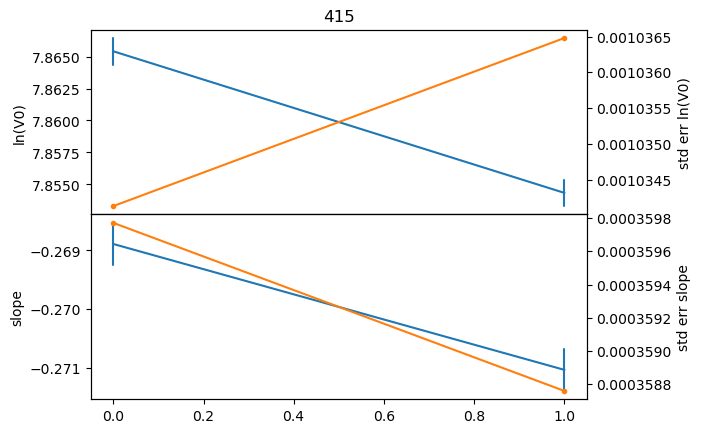

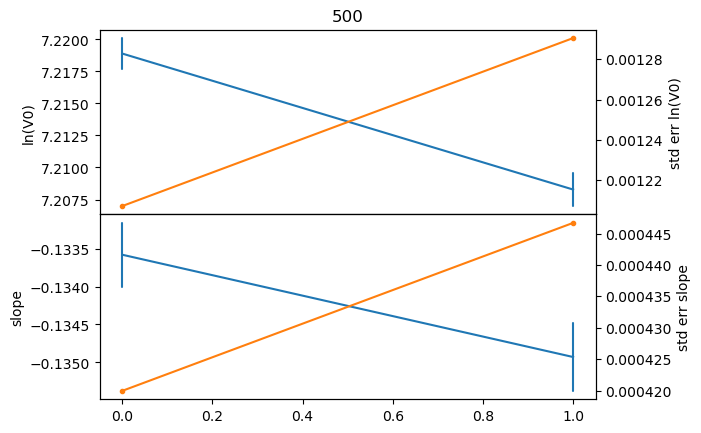

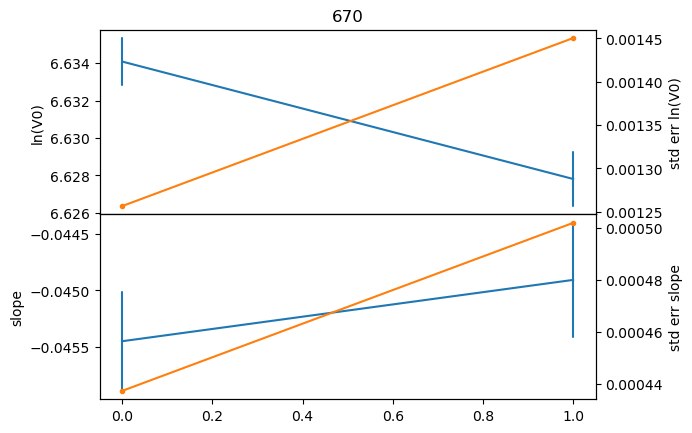

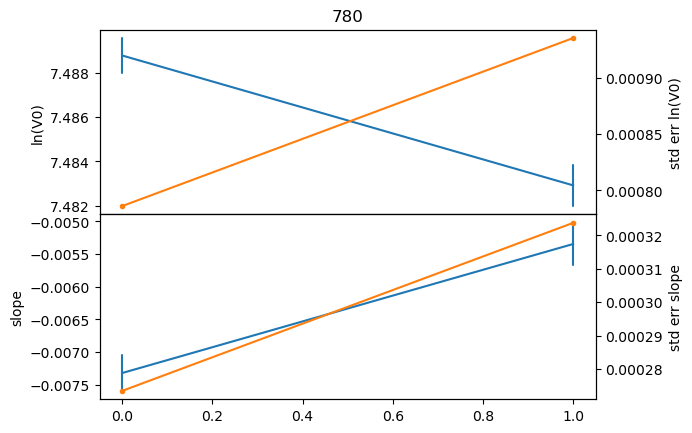

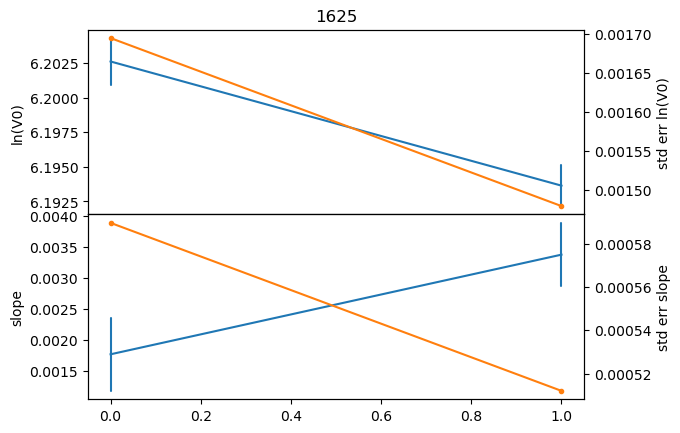

In [29]:
f,a = lt.plot_sorted(wl = 415, wlsort=500)
a[0].set_title('415')
f,a = lt.plot_sorted(wl = 500)
a[0].set_title('500')
f,a = lt.plot_sorted(wl = 670, wlsort=500)
a[0].set_title('670')
f,a = lt.plot_sorted(wl = 870, wlsort=500)
a[0].set_title('780')
f,a = lt.plot_sorted(wl = 1625, wlsort=500)
a[0].set_title('1625')

In [30]:
lt.V0_simple

<xarray.Dataset> Size: 336B
Dimensions:                              (wavelength: 6)
Coordinates:
  * wavelength                           (wavelength) int64 48B 415 500 ... 1625
Data variables:
    V0                                   (wavelength) float64 48B 2.591e+03 ....
    V0_std                               (wavelength) float64 48B 20.3 ... 3.127
    no_langleys                          (wavelength) int64 48B 2 2 2 2 2 2
    one_sided_upper_bound_factor_95conf  (wavelength) float64 48B 15.95 ... 1...
    OD_uncertainty                       (wavelength) float64 48B 0.1299 ... ...
    V0_stderr                            (wavelength) float64 48B 0.001035 .....

# create Langles

In [31]:
import atmPy.radiation.retrievals.spectral_irradiance as atmspir

'/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/{serialno}.langleys/v0.4'

## 648

In [34]:
version_in = '0.1' # this is the version of the mfrsr calibrated data
serialno = 648
lt = lt_pre_648
p2fld = pl.Path(f'{prefix}/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/{serialno}.cal/v{version_in}/')

In [11]:
p2flist = list(p2fld.glob('*'))
p2flist.sort()

In [12]:
p2flist

[PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20250924.nc'),
 PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20250925.nc'),
 PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20250926.nc'),
 PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20250927.nc'),
 PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20250928.nc'),
 PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20250929.nc'),
 PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20250930.nc'),
 PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20251001.nc'),
 PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20251002.nc'),
 PosixPath('/Users/htelg/nfs

### 20251018

In [13]:
%matplotlib inline

In [14]:
date = '1018'
p2f = pl.Path(f'{prefix}/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_2025{date}.nc')
fnmet = f'{prefix}/nfs/grad/campaign/frc/2025/MetaData.netcdf/frc-vi_metadata_2025{date}_preliminary.nc'

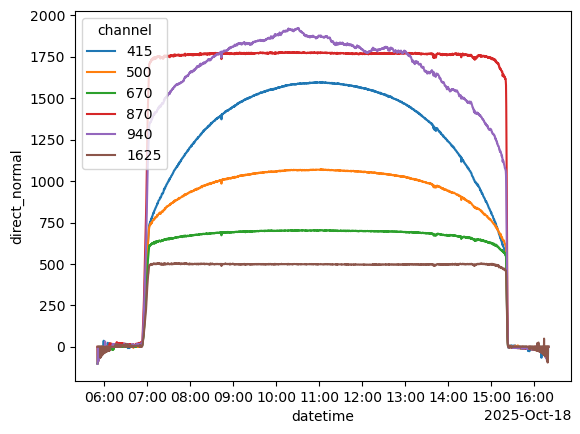

In [15]:
# first glance
f,a = plt.subplots()
ds = xr.open_dataset(p2f)
ds.direct_normal.plot.line(x = 'datetime', ax = a)
# at = a.twinx()
# cm.plot(ax= at)

In [16]:
out = helpers.get_langleys(ds, fnmet, 
                                        None,
                                        # lt,     
                                        langley_airmass_limits=(2.5, 4.5),
                                        clean = False,
                                        # test = True
                                       )
lang_am, lang_pm = out
if 1:
    lang_am.langleys = lang_am.langleys.dropna()
    
    lang_am = lang_am.clean(threshold=2, 
                  # use_channels=[500,]
                 )['langley']
if 1:
    lang_pm.langleys = lang_pm.langleys.dropna()
    
    lang_pm = lang_pm.clean(threshold=2, 
                  # use_channels=[500,]
                 )['langley']

skewness: -0.0374	 skewscale:2.1497
skewness: -0.0020	 skewscale:2.0080
skewness: 0.0021	 skewscale:2.0083
skewness: -0.0059	 skewscale:2.0234
skewness: -0.0159	 skewscale:2.0636
skewness: 0.0044	 skewscale:2.0175
skewness: -0.0053	 skewscale:2.0212
skewness: -0.0166	 skewscale:2.0662
skewness: -0.0131	 skewscale:2.0524
skewness: 0.0059	 skewscale:2.0238
skewness: 0.0067	 skewscale:2.0267
skewness: -0.2104	 skewscale:2.8418
skewness: -0.1565	 skewscale:2.6259
skewness: -0.0990	 skewscale:2.3959
skewness: -0.0793	 skewscale:2.3171
skewness: -0.0767	 skewscale:2.3068
skewness: -0.0880	 skewscale:2.3520


/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/Users/htelg/prog/atm-py/atmPy/radiation/retrievals/langley_calibration.py:861: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  langley.langleys = langley.langleys[where]
/Users/htelg/prog/atm-py/atmPy/radiation/retrievals/langley_calibration.py:861: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  langley.langleys = langley.langleys[where]
/Users/htelg/prog/atm-py/atmPy/radiation/retrievals/langley_calibration.py:861: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  langley.langleys = langley.langleys[where]
/Users/htelg/prog/atm-py/a

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

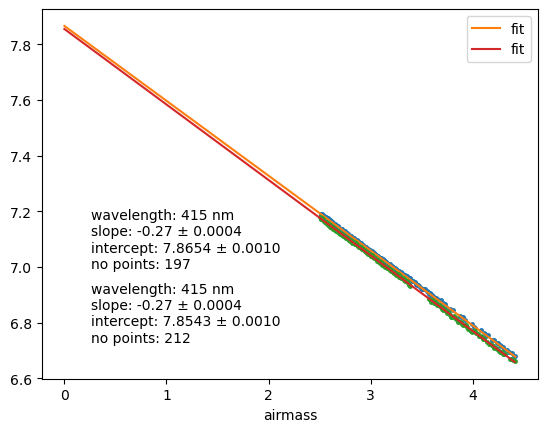

In [17]:
wl = 415
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, 
             ax = a
            )

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

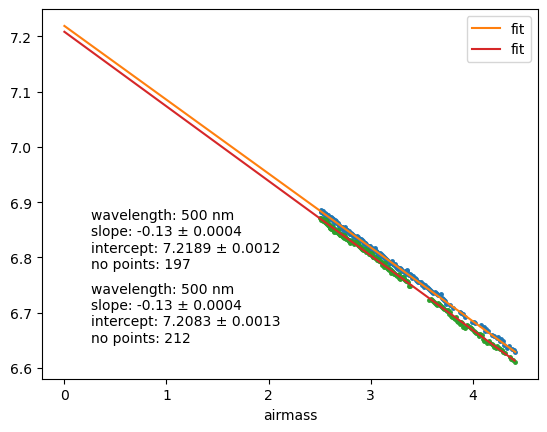

In [18]:
wl = 500
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

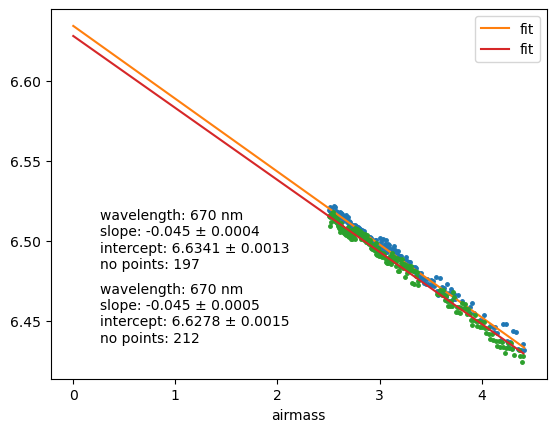

In [19]:
wl = 670
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

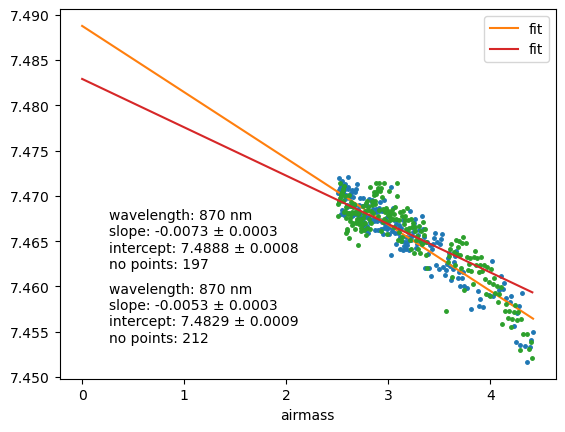

In [20]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

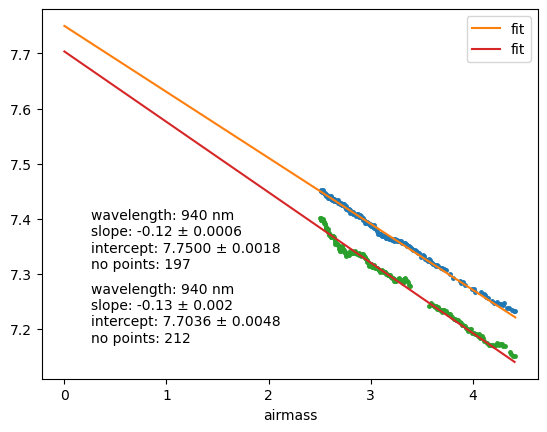

In [21]:
wl = 940
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

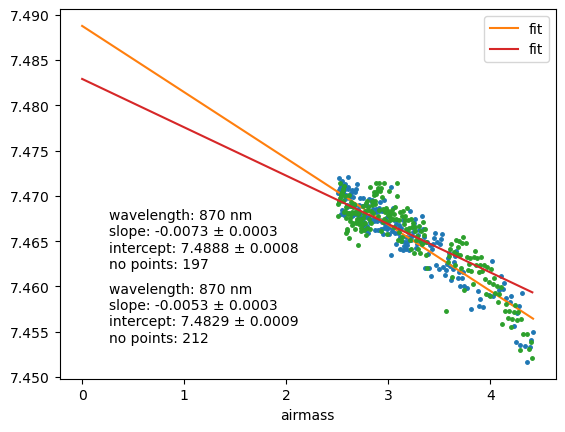

In [22]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

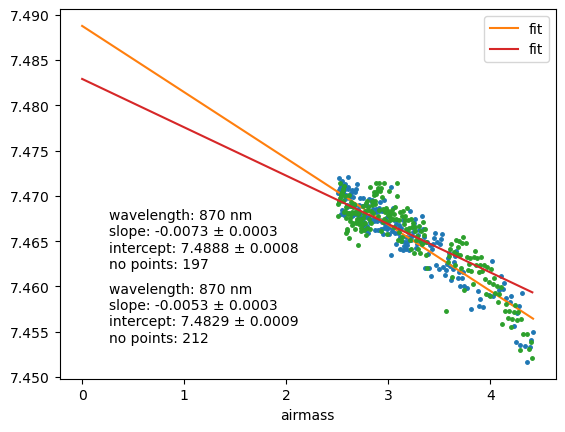

In [23]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

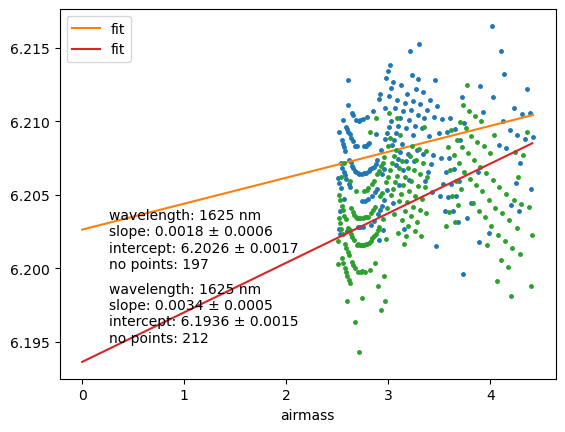

In [24]:
wl = 1625
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

In [25]:
lang = lang_am
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True, parents=True)
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.langleys/v0.4/langley_am_frc_648_v0.1_20251018.nc')

In [26]:
lang = lang_pm
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True)
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.langleys/v0.4/langley_pm_frc_648_v0.1_20251018.nc')

### 20251017

In [35]:
%matplotlib inline

In [36]:
date = '1017'
p2f = pl.Path(f'{prefix}/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_2025{date}.nc')
fnmet = f'{prefix}/nfs/grad/campaign/frc/2025/MetaData.netcdf/frc-vi_metadata_2025{date}_preliminary.nc'

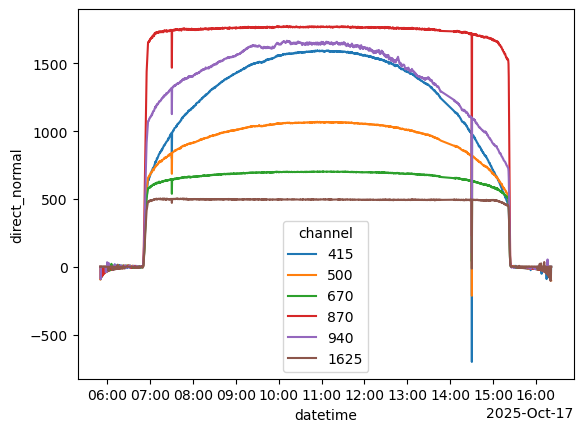

In [37]:
# first glance
ds = xr.open_dataset(p2f)
ds.direct_normal.plot.line(x = 'datetime')

In [38]:
lang_am, lang_pm = helpers.get_langleys(ds, fnmet, lt,     
                                        langley_airmass_limits=(2.5, 4.3),
                                        clean = False,
                                       )
# when there are 
if 0:
    lang_am.langleys = lang_am.langleys.dropna()
    
    lang_am = lang_am.clean(threshold=2, 
                  # use_channels=[500,]
                 )['langley']

/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/Users/htelg/prog/atm-py/atmPy/radiation/retrievals/spectral_irradiance.py:1604: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  ds['co2'] = xr.DataArray(np.zeros(tuple(self.dataset.dims[d] for d in ['datetime', 'channel'])),
/Users/htelg/prog/atm-py/atmPy/aerosols/physics/column_optical_properties.py:1108: UserWarning: Michalsky cloudmask may not work well for very low AOD values (<0.02, this values will need to be tested be

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

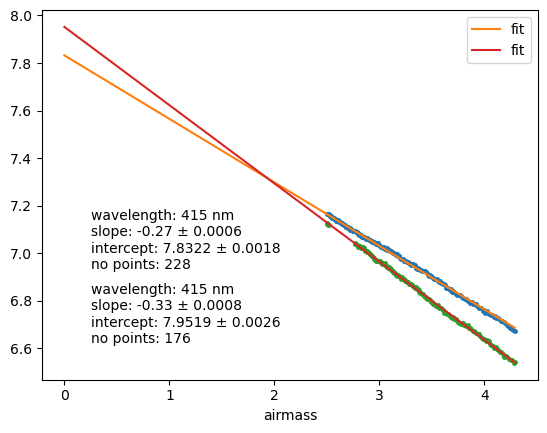

In [39]:
wl = 415
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

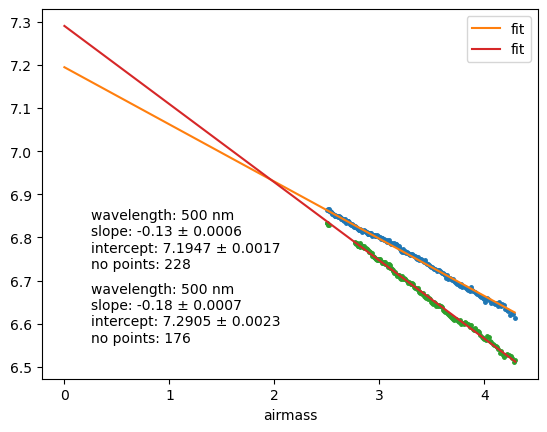

In [40]:
wl = 500
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

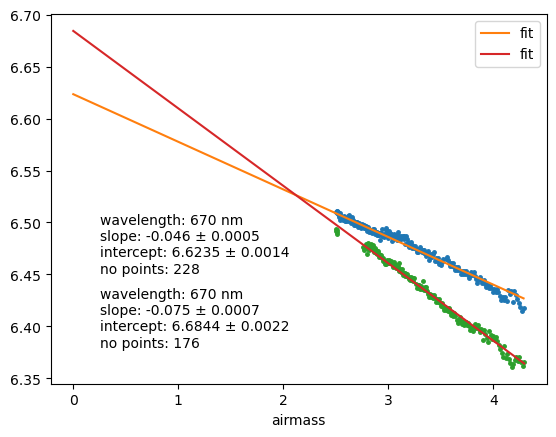

In [41]:
wl = 670
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

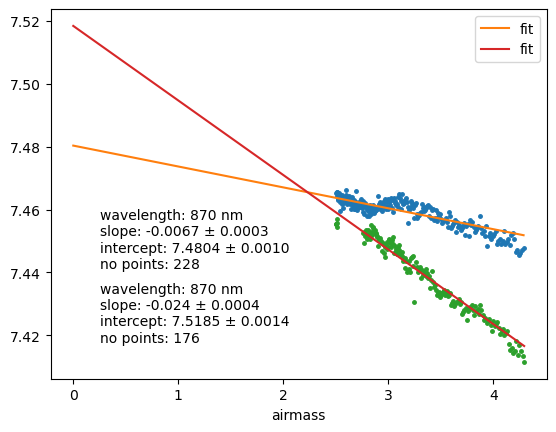

In [42]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

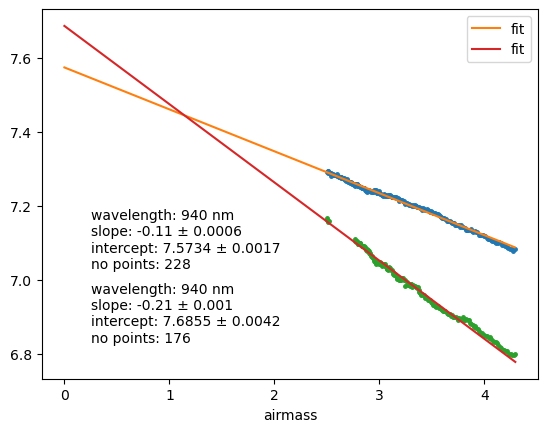

In [43]:
wl = 940
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

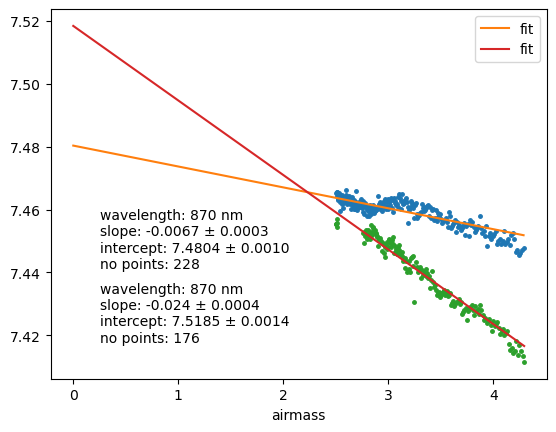

In [44]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

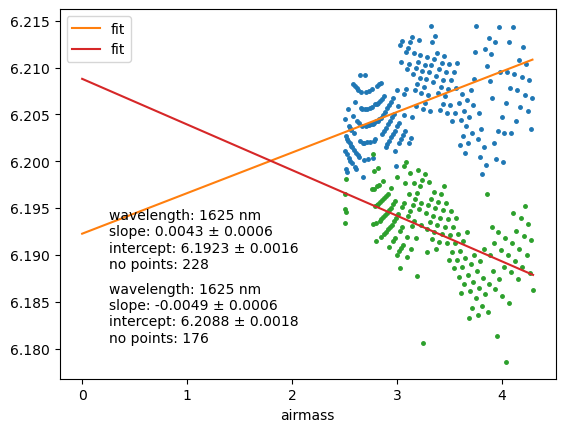

In [45]:
wl = 1625
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

In [46]:
lang = lang_am
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True, parents=True)
# p2out.unlink()
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.langleys/v0.4/langley_am_frc_648_v0.1_20251017.nc')

In [47]:
lang = lang_pm
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True)
# p2out.unlink()
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.langleys/v0.4/langley_pm_frc_648_v0.1_20251017.nc')

### 20251016

In [48]:
%matplotlib inline

In [49]:
date = '1016'
p2f = pl.Path(f'{prefix}/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_2025{date}.nc')
fnmet = f'{prefix}/nfs/grad/campaign/frc/2025/MetaData.netcdf/frc-vi_metadata_2025{date}_preliminary.nc'

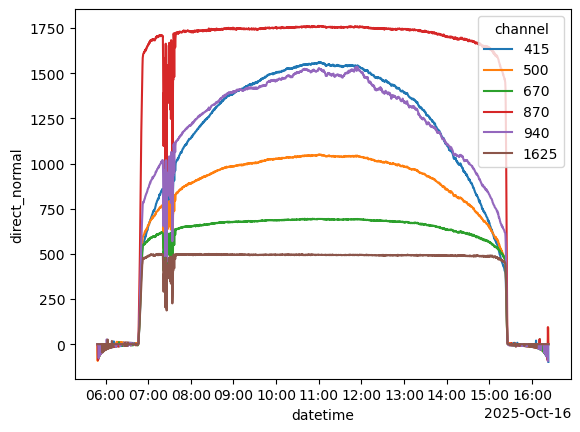

In [50]:
# first glance
ds = xr.open_dataset(p2f)
ds.direct_normal.plot.line(x = 'datetime')

In [51]:
lang_am, lang_pm = helpers.get_langleys(ds, fnmet, lt,     
                                        langley_airmass_limits=(2.5, 4.3),
                                        clean = False,
                                       )

if 0:
    lang_am.langleys = lang_am.langleys.dropna()
    
    lang_am = lang_am.clean(threshold=2, 
                  # use_channels=[500,]
                 )['langley']

/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/Users/htelg/prog/atm-py/atmPy/radiation/retrievals/spectral_irradiance.py:1604: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  ds['co2'] = xr.DataArray(np.zeros(tuple(self.dataset.dims[d] for d in ['datetime', 'channel'])),
/Users/htelg/prog/atm-py/atmPy/aerosols/physics/column_optical_properties.py:1108: UserWarning: Michalsky cloudmask may not work well for very low AOD values (<0.02, this values will need to be tested be

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

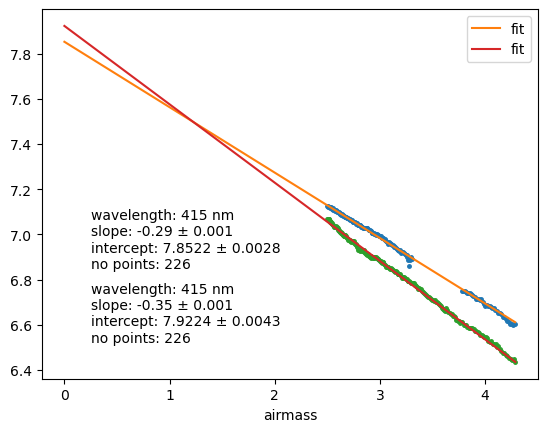

In [52]:
wl = 415
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

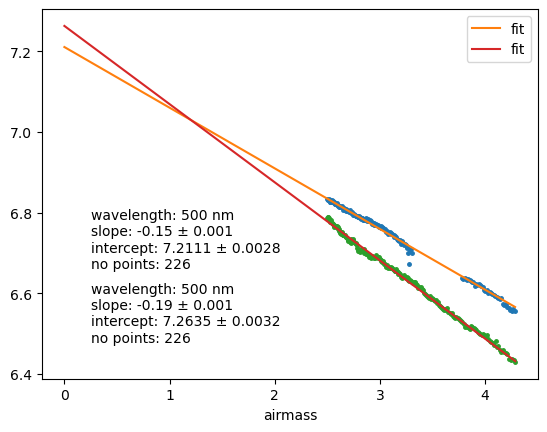

In [53]:
wl = 500
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

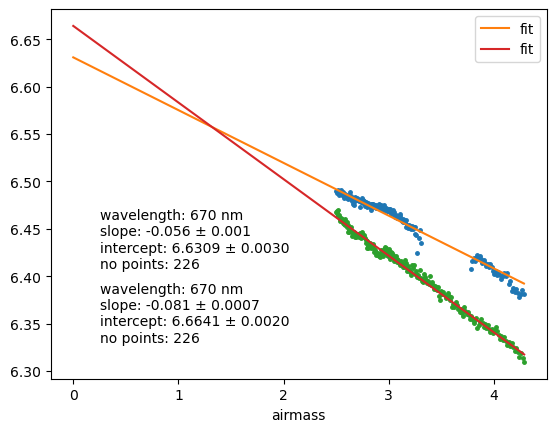

In [54]:
wl = 670
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

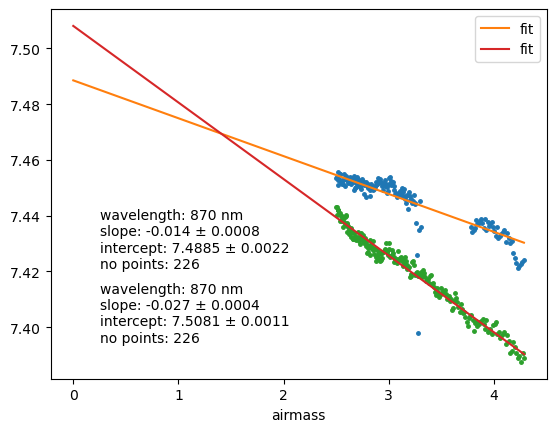

In [55]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

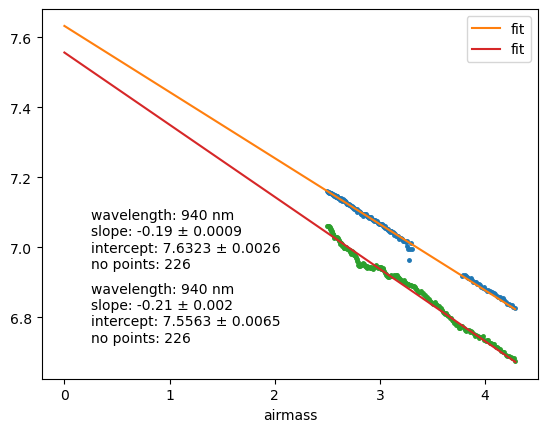

In [56]:
wl = 940
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

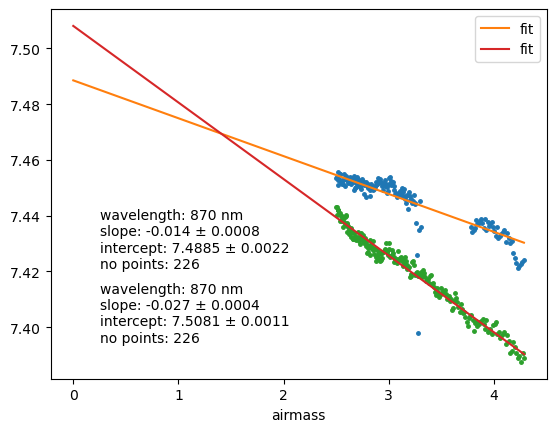

In [57]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

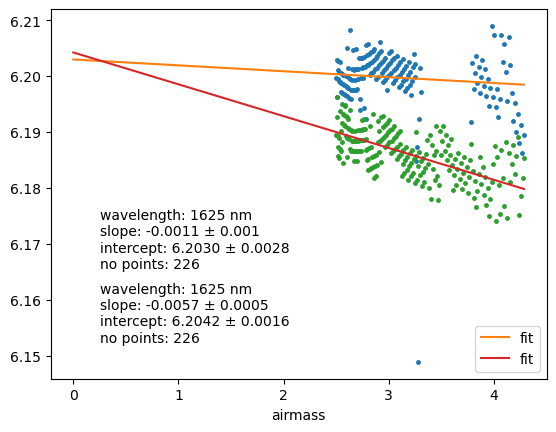

In [58]:
wl = 1625
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

In [59]:
lang = lang_am
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True, parents=True)
# p2out.unlink()
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.langleys/v0.4/langley_am_frc_648_v0.1_20251016.nc')

In [60]:
lang = lang_pm
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True)
# p2out.unlink()
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.langleys/v0.4/langley_pm_frc_648_v0.1_20251016.nc')

### 20251015

In [61]:
%matplotlib inline

In [62]:
date = '1015'
p2f = pl.Path(f'{prefix}/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_2025{date}.nc')
fnmet = f'{prefix}/nfs/grad/campaign/frc/2025/MetaData.netcdf/frc-vi_metadata_2025{date}_preliminary.nc'

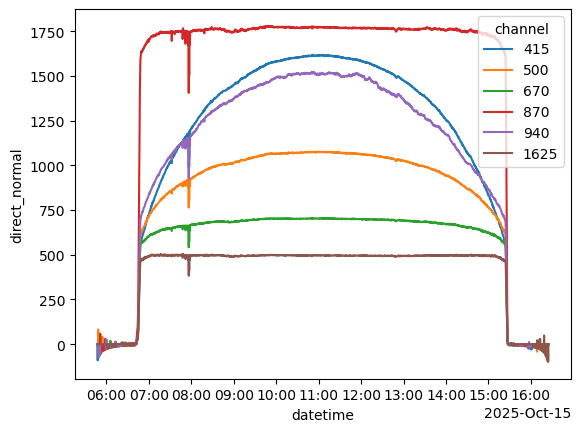

In [63]:
# first glance
ds = xr.open_dataset(p2f)
ds.direct_normal.plot.line(x = 'datetime')

In [64]:
lang_am, lang_pm = helpers.get_langleys(ds, fnmet, lt,     
                                        langley_airmass_limits=(2.5, 4.3),
                                        clean = False,
                                       )
if 0:
    lang_am.langleys = lang_am.langleys.dropna()
    lang_am = lang_am.clean(threshold=2, 
                  # use_channels=[500,]
                 )['langley']

/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/Users/htelg/prog/atm-py/atmPy/radiation/retrievals/spectral_irradiance.py:1604: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  ds['co2'] = xr.DataArray(np.zeros(tuple(self.dataset.dims[d] for d in ['datetime', 'channel'])),
/Users/htelg/prog/atm-py/atmPy/aerosols/physics/column_optical_properties.py:1108: UserWarning: Michalsky cloudmask may not work well for very low AOD values (<0.02, this values will need to be tested be

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

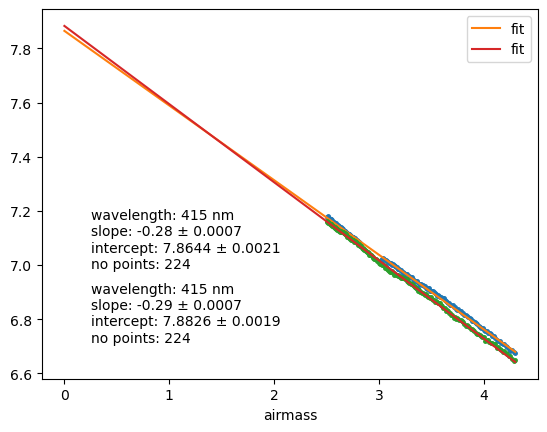

In [65]:
wl = 415
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

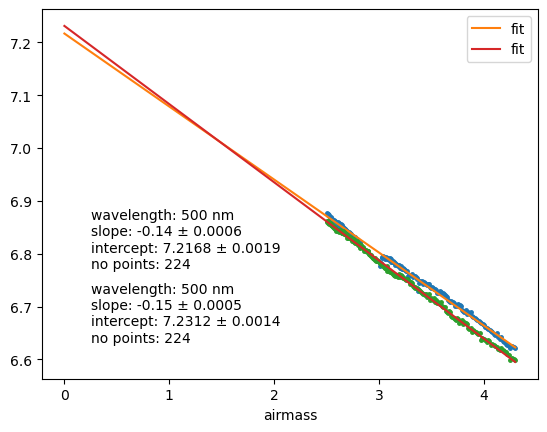

In [66]:
wl = 500
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

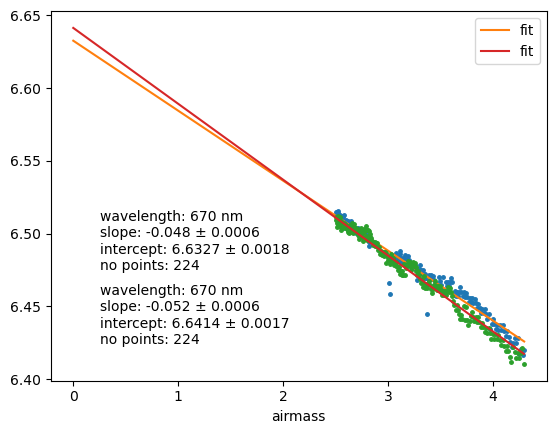

In [67]:
wl = 670
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

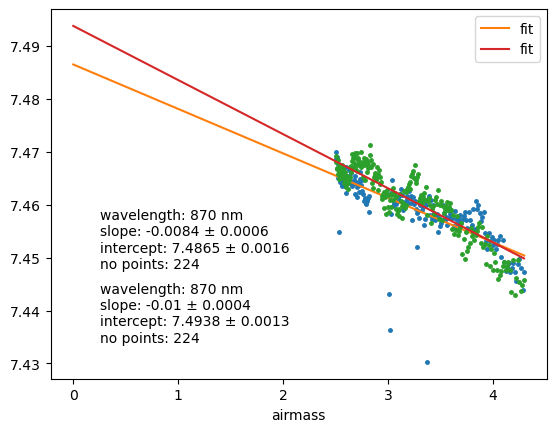

In [68]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

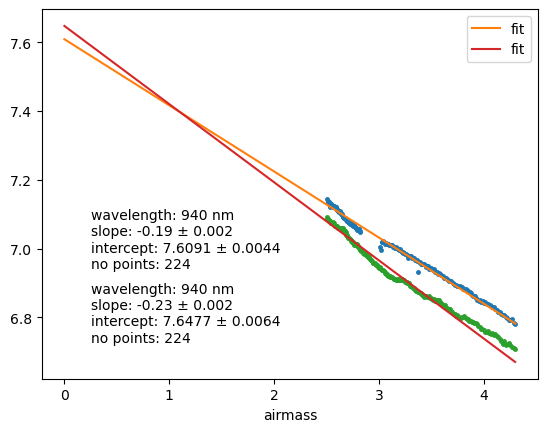

In [69]:
wl = 940
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

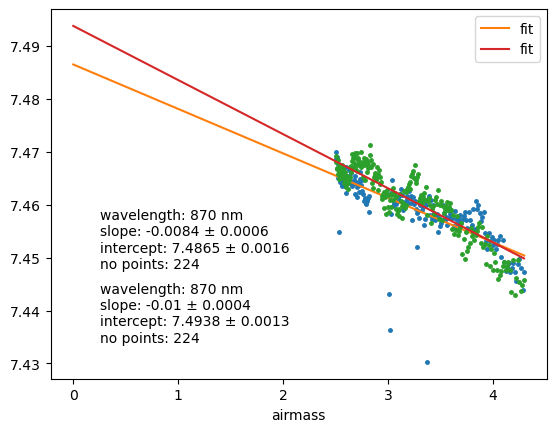

In [70]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

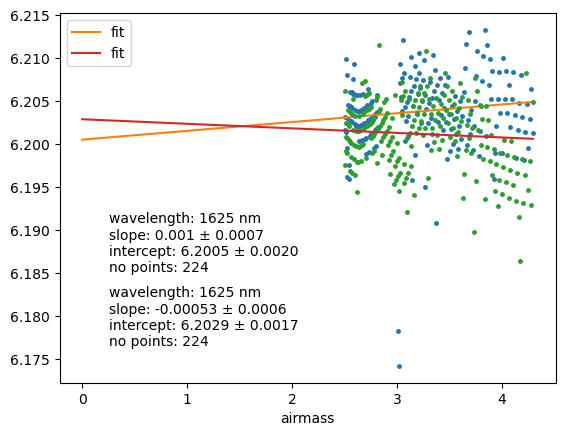

In [71]:
wl = 1625
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

In [72]:
lang = lang_am
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True, parents=True)
# p2out.unlink()
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.langleys/v0.4/langley_am_frc_648_v0.1_20251015.nc')

In [73]:
lang = lang_pm
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True)
# p2out.unlink()
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.langleys/v0.4/langley_pm_frc_648_v0.1_20251015.nc')

### 20251014

In [74]:
%matplotlib inline

In [75]:
date = '1014'
p2f = pl.Path(f'{prefix}/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_2025{date}.nc')
fnmet = f'{prefix}/nfs/grad/campaign/frc/2025/MetaData.netcdf/frc-vi_metadata_2025{date}_preliminary.nc'

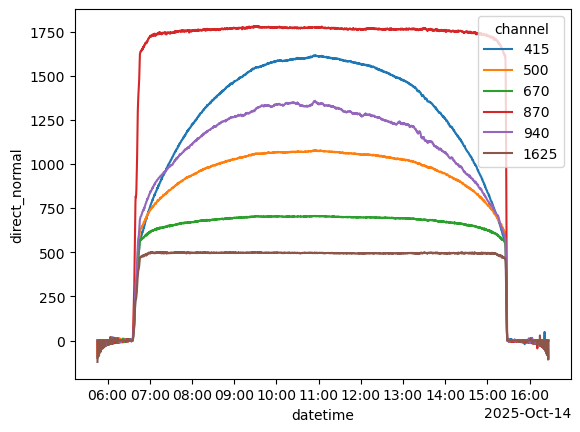

In [76]:
# first glance
ds = xr.open_dataset(p2f)
ds.direct_normal.plot.line(x = 'datetime')

In [77]:
reload(helpers)

<module 'helpers' from '/Users/htelg/projects/cmpaign_2025_PMOD/helpers.py'>

In [78]:
lang_am, lang_pm = helpers.get_langleys(ds, fnmet, lt,     
                                        langley_airmass_limits=(2.5, 4.3),
                                       )

/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/Users/htelg/prog/atm-py/atmPy/radiation/retrievals/spectral_irradiance.py:1604: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  ds['co2'] = xr.DataArray(np.zeros(tuple(self.dataset.dims[d] for d in ['datetime', 'channel'])),
/Users/htelg/prog/atm-py/atmPy/aerosols/physics/column_optical_properties.py:1108: UserWarning: Michalsky cloudmask may not work well for very low AOD values (<0.02, this values will need to be tested be

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

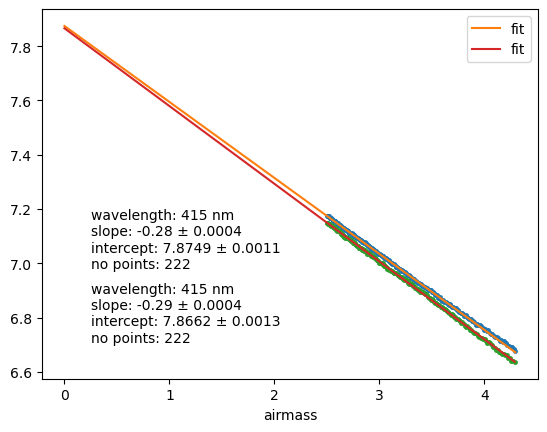

In [79]:
wl = 415
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

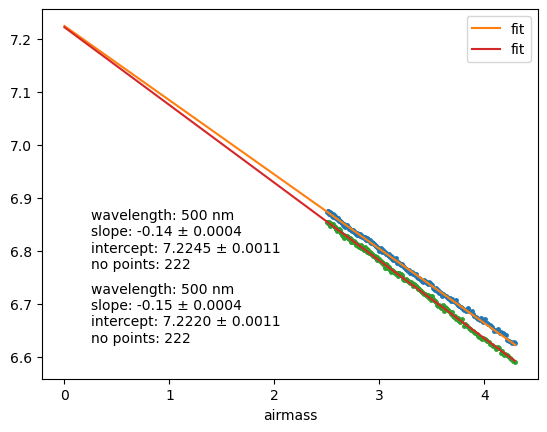

In [80]:
wl = 500
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

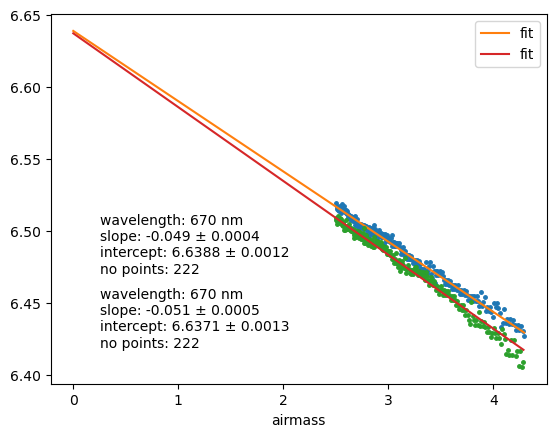

In [81]:
wl = 670
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

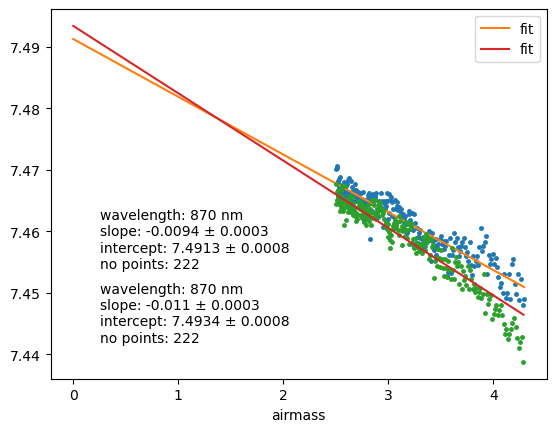

In [82]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

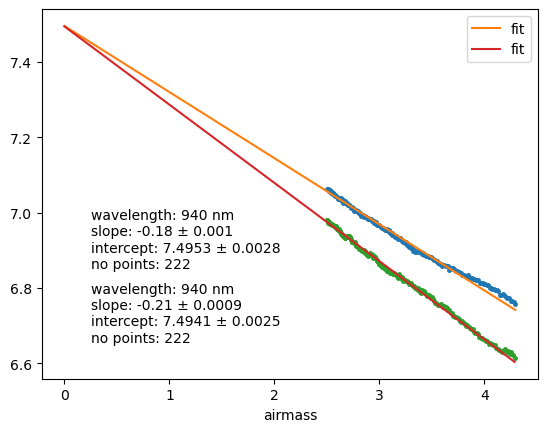

In [83]:
wl = 940
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

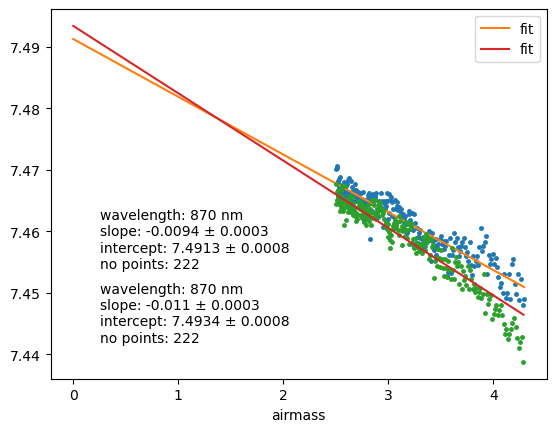

In [84]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

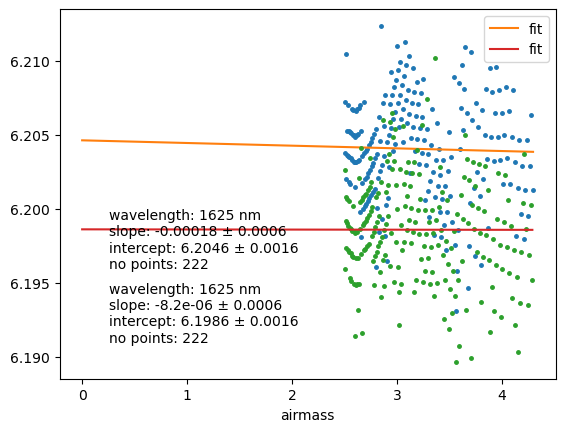

In [85]:
wl = 1625
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

In [86]:
lang = lang_am
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True, parents=True)
# p2out.unlink()
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.langleys/v0.4/langley_am_frc_648_v0.1_20251014.nc')

In [87]:
lang = lang_pm
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True)
# p2out.unlink()
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.langleys/v0.4/langley_pm_frc_648_v0.1_20251014.nc')

### 20251013

In [88]:
%matplotlib inline

In [89]:
date = '1013'
p2f = pl.Path(f'{prefix}/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_2025{date}.nc')
fnmet = f'{prefix}/nfs/grad/campaign/frc/2025/MetaData.netcdf/frc-vi_metadata_2025{date}_preliminary.nc'

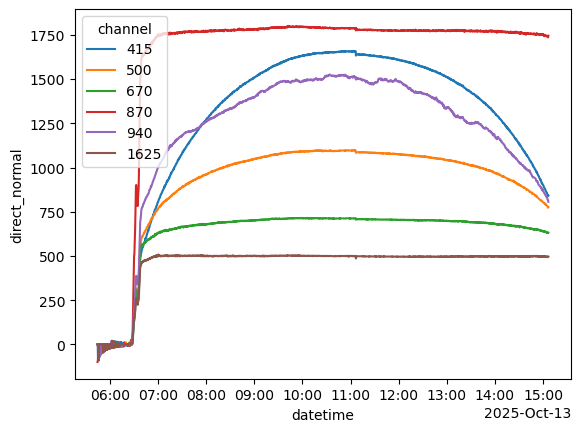

In [90]:
# first glance
ds = xr.open_dataset(p2f)
ds.direct_normal.plot.line(x = 'datetime')

In [91]:
reload(helpers)

<module 'helpers' from '/Users/htelg/projects/cmpaign_2025_PMOD/helpers.py'>

In [92]:
# apply
lang_am, lang_pm = helpers.get_langleys(ds, fnmet, 
                                        # lt,   
                                        None,
                                        langley_airmass_limits=(2.5, 4.5),
                                       )

/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)


(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

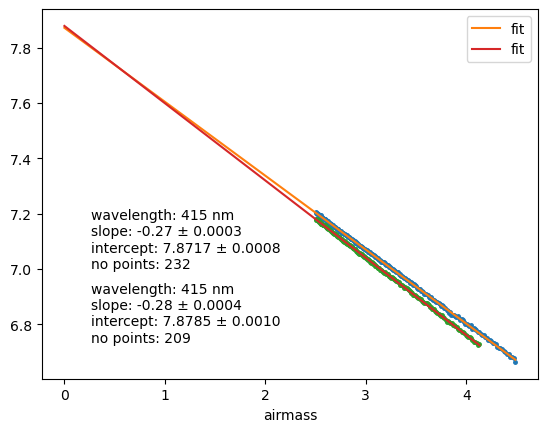

In [93]:
wl = 415
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

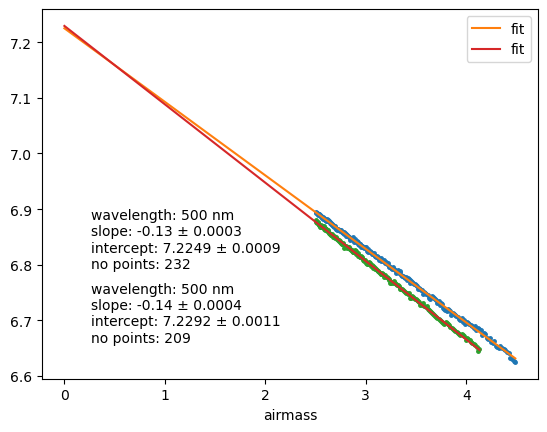

In [94]:
wl = 500
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

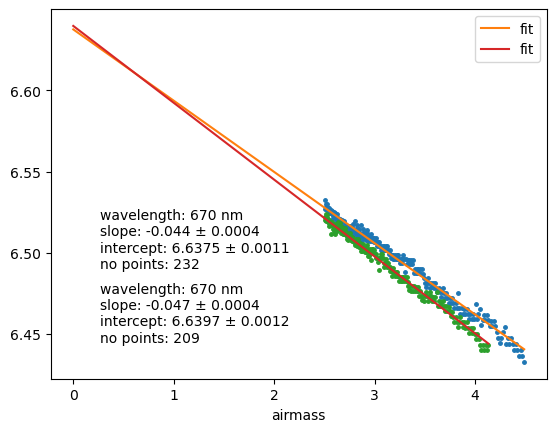

In [95]:
wl = 670
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

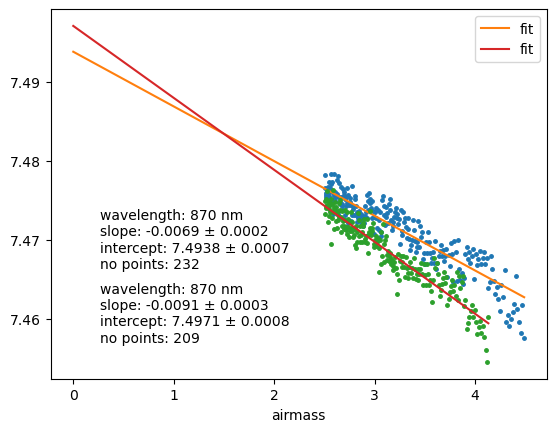

In [96]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

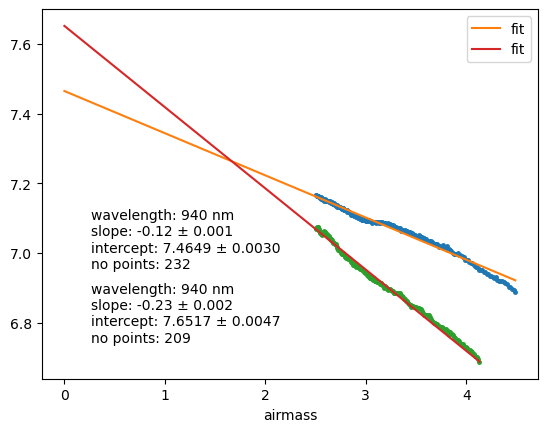

In [97]:
wl = 940
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

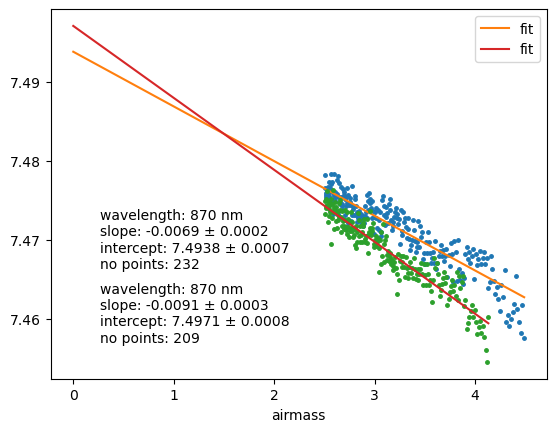

In [98]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

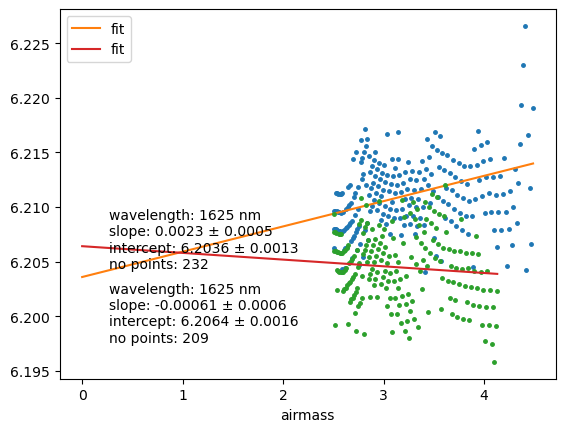

In [99]:
wl = 1625
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

In [100]:
lang = lang_am
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True, parents=True)
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.langleys/v0.4/langley_am_frc_648_v0.1_20251013.nc')

In [101]:
lang = lang_pm
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True)
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.langleys/v0.4/langley_pm_frc_648_v0.1_20251013.nc')

### 20251012

In [102]:
%matplotlib inline

In [103]:
date = '1012'
p2f = pl.Path(f'{prefix}/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_2025{date}.nc')
fnmet = f'{prefix}/nfs/grad/campaign/frc/2025/MetaData.netcdf/frc-vi_metadata_2025{date}_preliminary.nc'

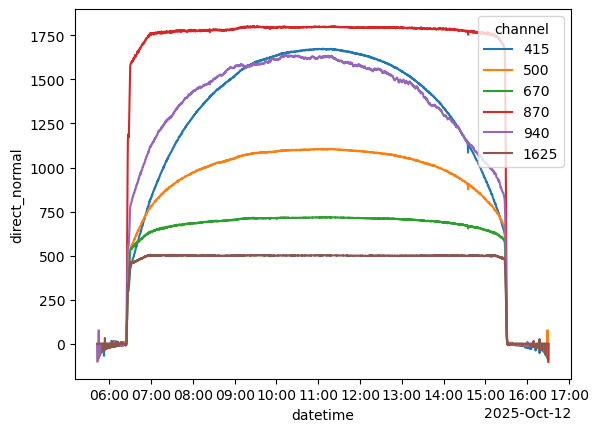

In [104]:
# first glance
ds = xr.open_dataset(p2f)
ds.direct_normal.plot.line(x = 'datetime')

In [105]:
reload(helpers)

<module 'helpers' from '/Users/htelg/projects/cmpaign_2025_PMOD/helpers.py'>

In [106]:
# apply
lang_am, lang_pm = helpers.get_langleys(ds, fnmet, 
                                        # lt,
                                        None,
                                        langley_airmass_limits=(2.5, 4.5),
                                       )

/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)


(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

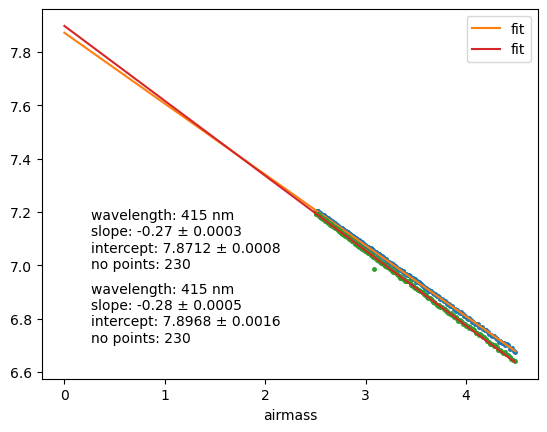

In [107]:
wl = 415
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

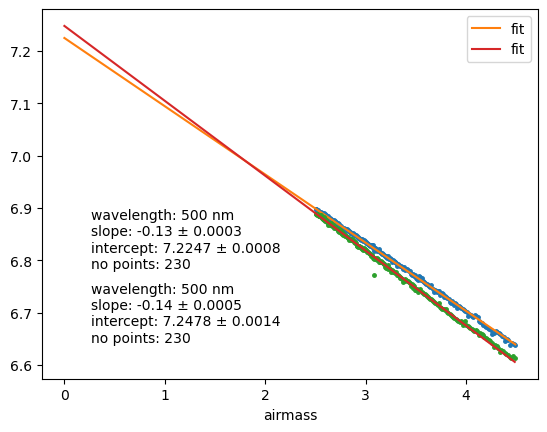

In [108]:
wl = 500
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

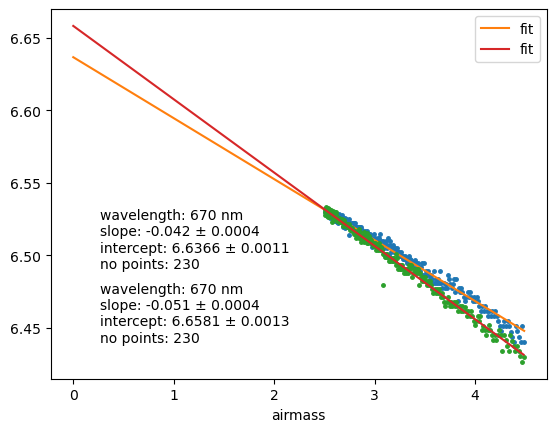

In [109]:
wl = 670
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

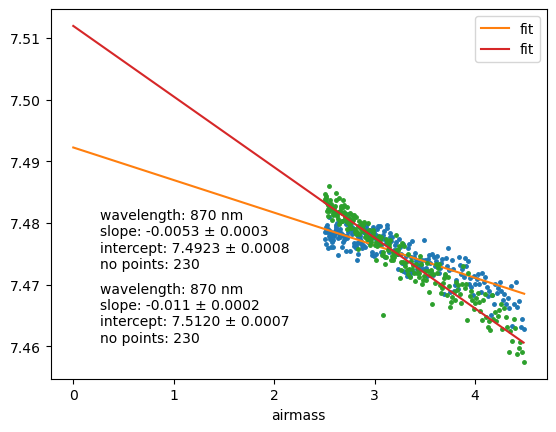

In [110]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

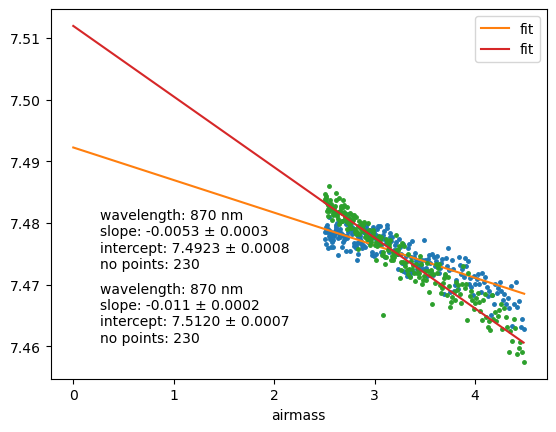

In [111]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

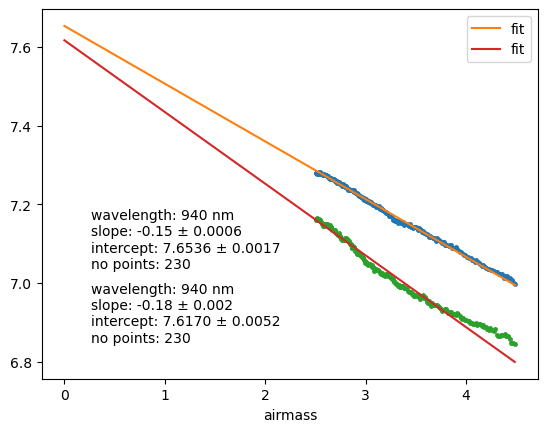

In [112]:
wl = 940
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

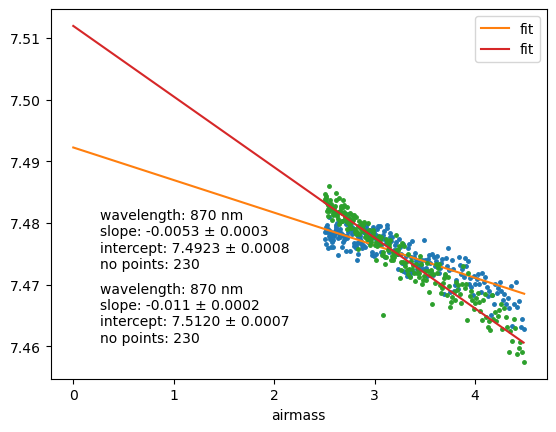

In [113]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

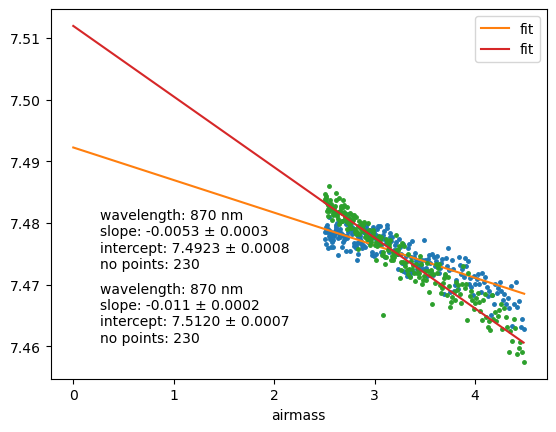

In [114]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

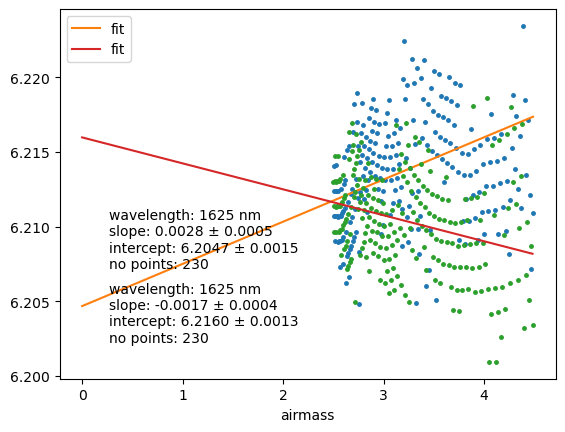

In [115]:
wl = 1625
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

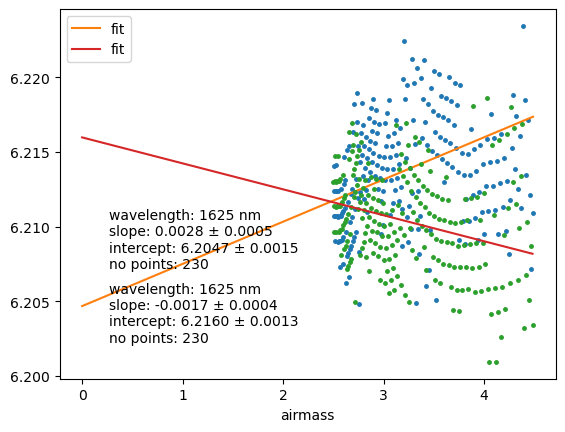

In [116]:
wl = 1625
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

In [117]:
lang = lang_am
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True)
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.langleys/v0.4/langley_am_frc_648_v0.1_20251012.nc')

In [118]:
lang = lang_pm
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True)
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.langleys/v0.4/langley_pm_frc_648_v0.1_20251012.nc')

### 20251011

In [119]:
%matplotlib inline

In [120]:
date = '1011'
p2f = pl.Path(f'{prefix}/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_2025{date}.nc')
fnmet = f'{prefix}/nfs/grad/campaign/frc/2025/MetaData.netcdf/frc-vi_metadata_2025{date}_preliminary.nc'

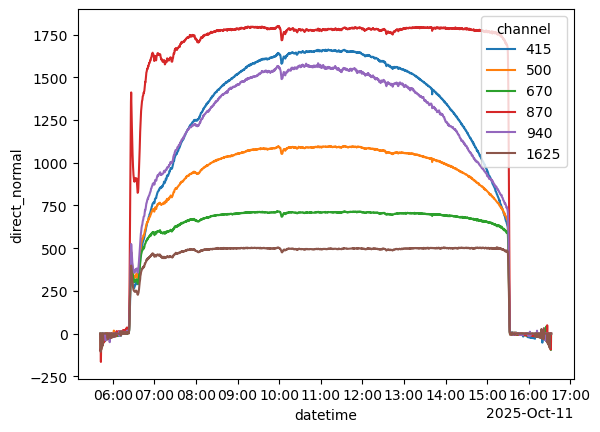

In [121]:
# first glance
ds = xr.open_dataset(p2f)
ds.direct_normal.plot.line(x = 'datetime')

In [122]:
reload(helpers)

<module 'helpers' from '/Users/htelg/projects/cmpaign_2025_PMOD/helpers.py'>

In [123]:
# apply
lang_am, lang_pm = helpers.get_langleys(ds, fnmet, 
                                        # lt,
                                        None,
                                        langley_airmass_limits=(2.5, 4.5),
                                       )

/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)


(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

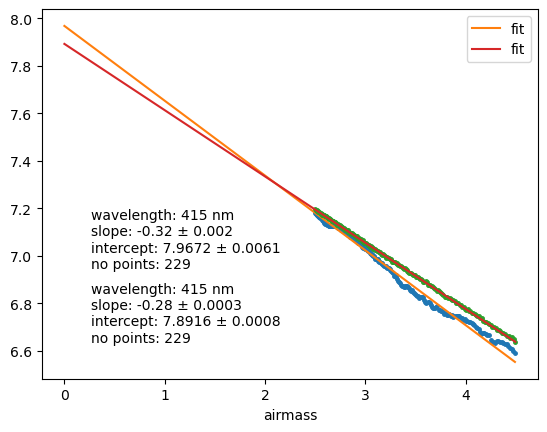

In [124]:
wl = 415
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

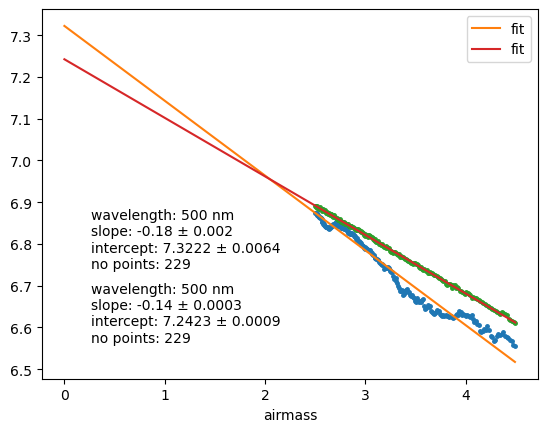

In [125]:
wl = 500
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

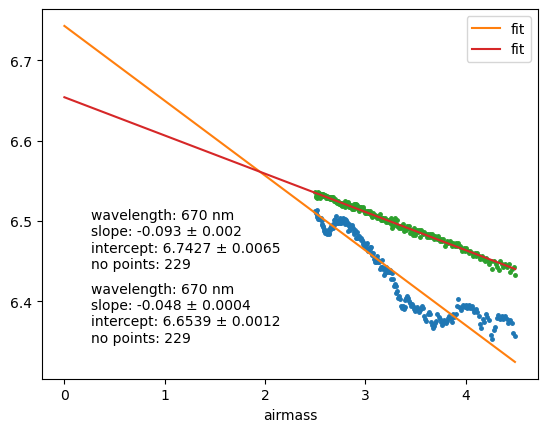

In [126]:
wl = 670
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

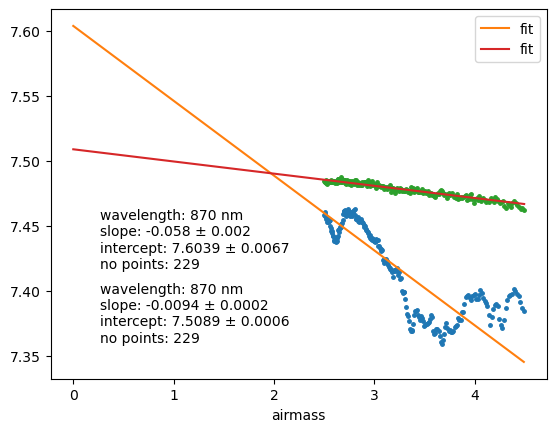

In [127]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

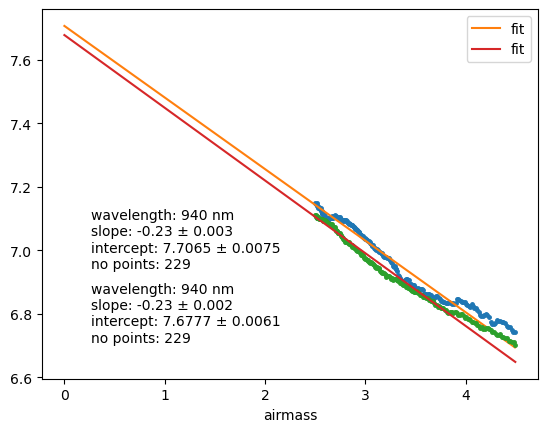

In [128]:
wl = 940
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

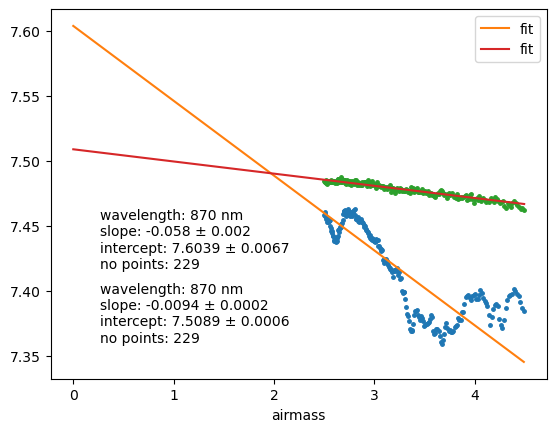

In [129]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

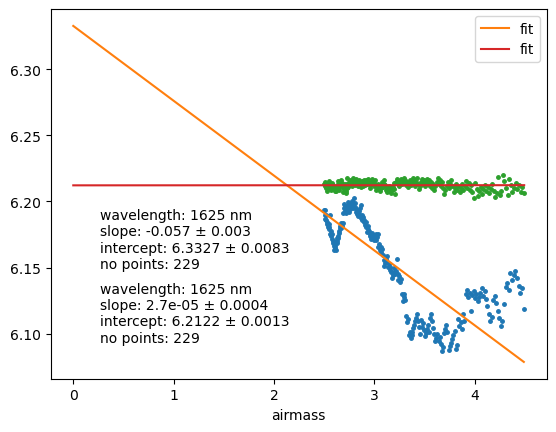

In [130]:
wl = 1625
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

In [131]:
# lang = lang_am
# p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
# p2out.parent.mkdir(exist_ok=True)
# if not p2out.is_file():
#     lang.save2netcdf(p2out)
# else:
#     print('File exist!!!')
# p2out    

In [132]:
lang = lang_pm
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True)
# p2out.unlink()
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.langleys/v0.4/langley_pm_frc_648_v0.1_20251011.nc')

### 20251002

In [133]:
p2f = pl.Path(f'{prefix}/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20251002.nc')
fnmet = f'{prefix}/nfs/grad/campaign/frc/2025/MetaData.netcdf/frc-vi_metadata_20251002_preliminary.nc'
lt = lt_pre_648

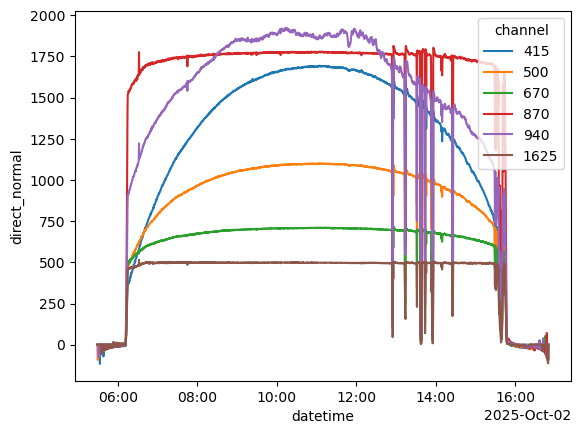

In [134]:
# first glance
ds = xr.open_dataset(p2f)
ds.direct_normal.plot.line(x = 'datetime')

In [135]:
reload(helpers)

<module 'helpers' from '/Users/htelg/projects/cmpaign_2025_PMOD/helpers.py'>

In [136]:
# apply
lang_am, lang_pm = helpers.get_langleys(ds, fnmet, lt,
                                        langley_airmass_limits=(2.5, 4.5),)

/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/Users/htelg/prog/atm-py/atmPy/radiation/retrievals/spectral_irradiance.py:1604: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  ds['co2'] = xr.DataArray(np.zeros(tuple(self.dataset.dims[d] for d in ['datetime', 'channel'])),
/Users/htelg/prog/atm-py/atmPy/aerosols/physics/column_optical_properties.py:1108: UserWarning: Michalsky cloudmask may not work well for very low AOD values (<0.02, this values will need to be tested be

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

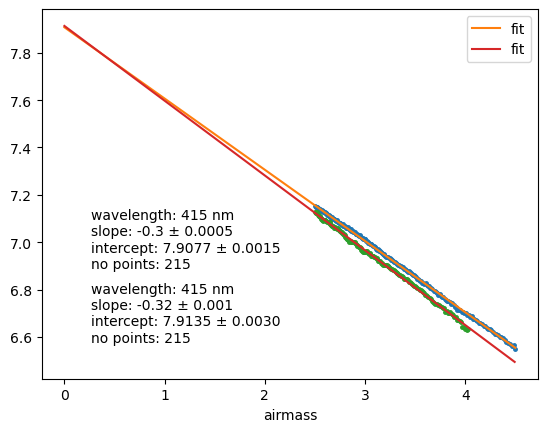

In [137]:
wl = 415
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

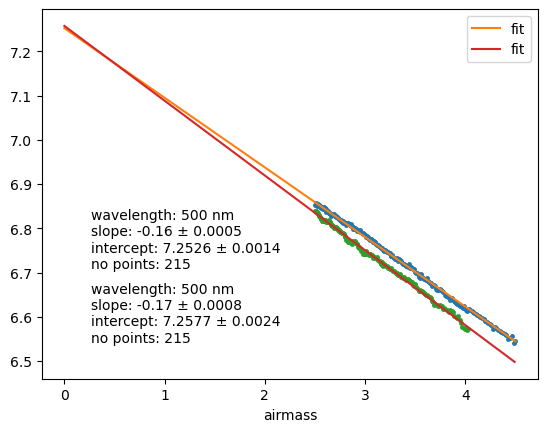

In [138]:
wl = 500
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

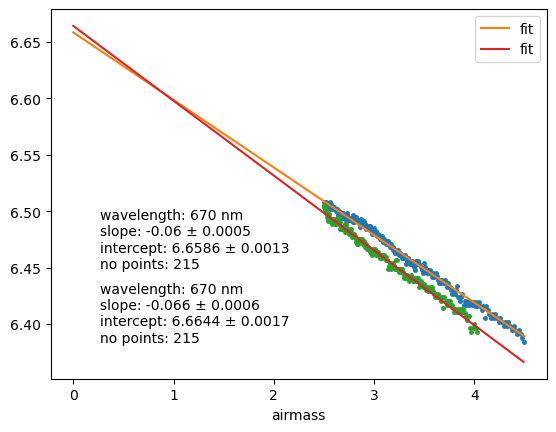

In [139]:
wl = 670
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

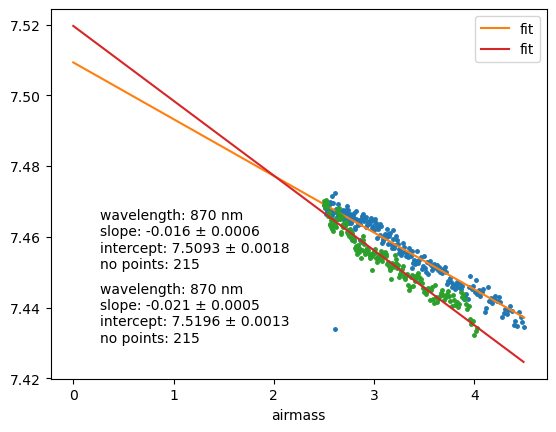

In [140]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

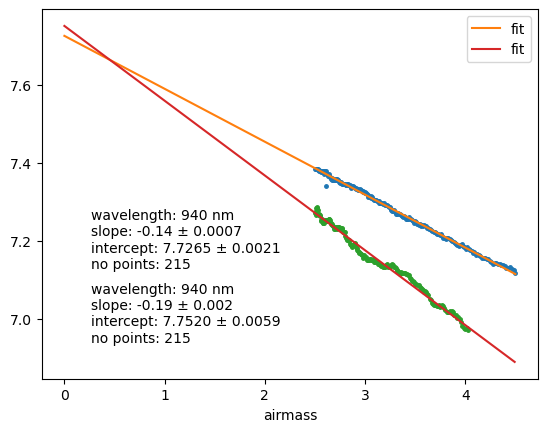

In [141]:
wl = 940
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

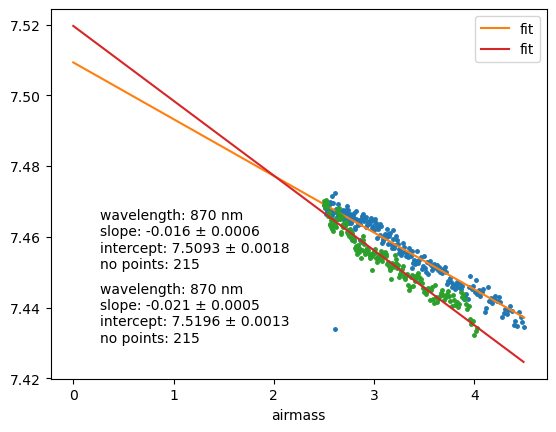

In [142]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

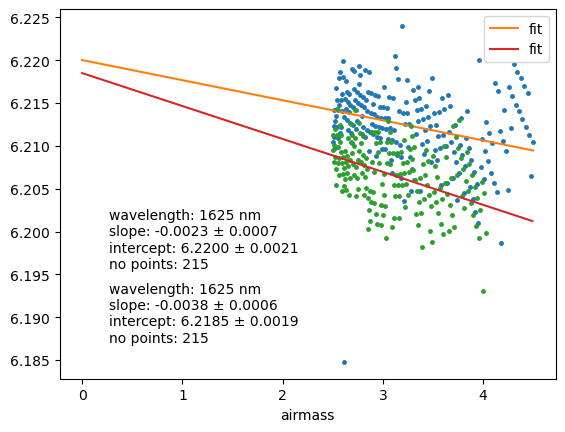

In [143]:
wl = 1625
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

In [144]:
lang = lang_am
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True)
# p2out.unlink()
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.langleys/v0.4/langley_am_frc_648_v0.1_20251002.nc')

In [145]:
# lang = lang_pm
# p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
# p2out.parent.mkdir()
# if not p2out.is_file():
#     lang.save2netcdf(p2out)
# else:
#     print('File exist!!!')
# p2out    

### 20250928

In [146]:
p2f = pl.Path(f'{prefix}/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20250928.nc')
fnmet = f'{prefix}/nfs/grad/campaign/frc/2025/MetaData.netcdf/frc-vi_metadata_20250928_preliminary.nc'

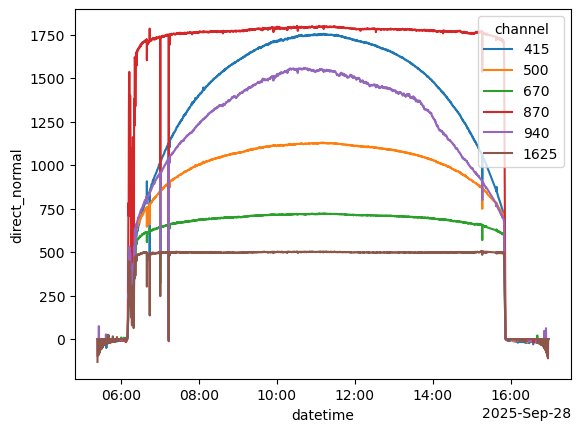

In [147]:
# first glance
ds = xr.open_dataset(p2f)
ds.direct_normal.plot.line(x = 'datetime')

In [148]:
reload(helpers)

<module 'helpers' from '/Users/htelg/projects/cmpaign_2025_PMOD/helpers.py'>

In [149]:
# apply
lang_am, lang_pm = helpers.get_langleys(ds, fnmet, 
                                        # lt,
                                        None,
                                        langley_airmass_limits=(2.5, 4.5),
                                       )

/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)


In [150]:
if 1:
    lang_am.langleys = lang_am.langleys.dropna()
    
    lang_am = lang_am.clean(threshold=3, 
                  # use_channels=[500,]
                 )['langley']
if 1:
    lang_pm.langleys = lang_pm.langleys.dropna()
    
    lang_pm = lang_pm.clean(threshold=3, 
                  # use_channels=[500,]
                 )['langley']

skewness: -0.1073	 skewscale:3.9657
skewness: -0.1004	 skewscale:3.9032
skewness: -0.0851	 skewscale:3.7655
skewness: -0.1183	 skewscale:4.0650
skewness: -0.1227	 skewscale:4.1039
skewness: -0.1232	 skewscale:4.1089
skewness: -0.1377	 skewscale:4.2393
skewness: -0.1514	 skewscale:4.3628
skewness: 0.0014	 skewscale:3.0125
skewness: -0.0022	 skewscale:3.0202


/Users/htelg/prog/atm-py/atmPy/radiation/retrievals/langley_calibration.py:861: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  langley.langleys = langley.langleys[where]
/Users/htelg/prog/atm-py/atmPy/radiation/retrievals/langley_calibration.py:861: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  langley.langleys = langley.langleys[where]
/Users/htelg/prog/atm-py/atmPy/radiation/retrievals/langley_calibration.py:861: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  langley.langleys = langley.langleys[where]
/Users/htelg/prog/atm-py/atmPy/radiation/retrievals/langley_calibration.py:861: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  langley.langleys = langley.langleys[where]
/Users/htelg/prog/atm-py/atmPy/radiation/retrievals/langley_calibration.py:861: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  langley.langleys = langley.langleys[wh

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

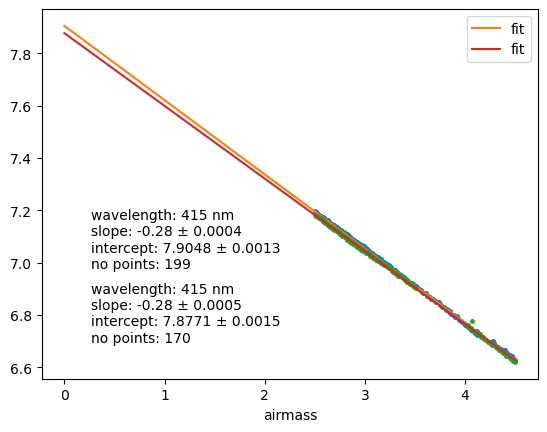

In [151]:
wl = 415
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

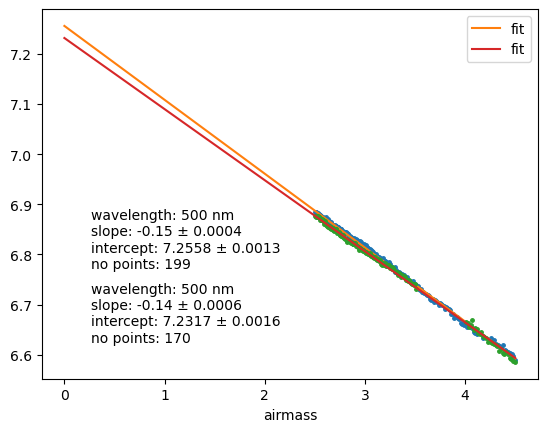

In [152]:
wl = 500
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

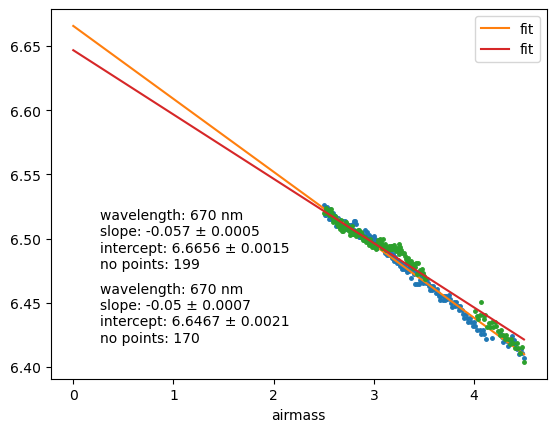

In [153]:
wl = 670
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

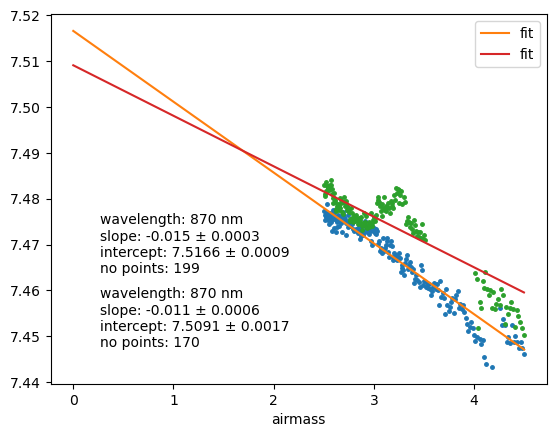

In [154]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

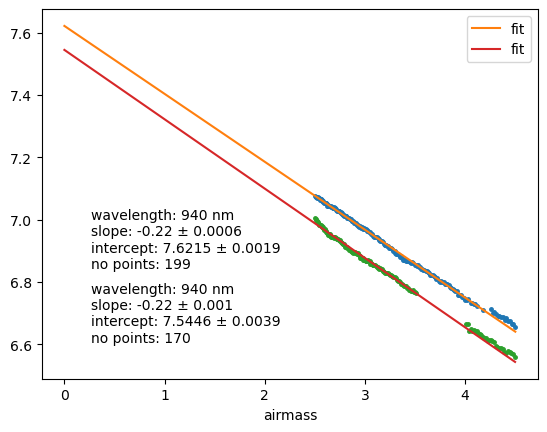

In [155]:
wl = 940
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

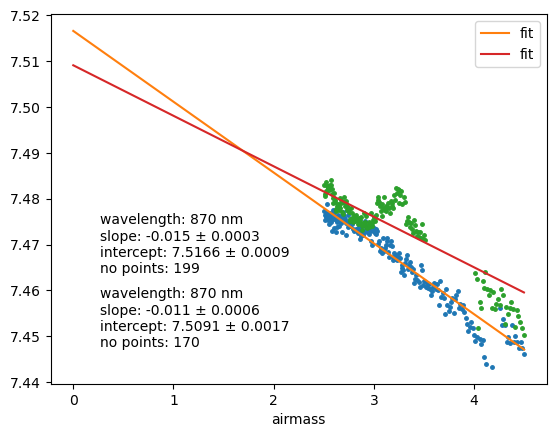

In [156]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

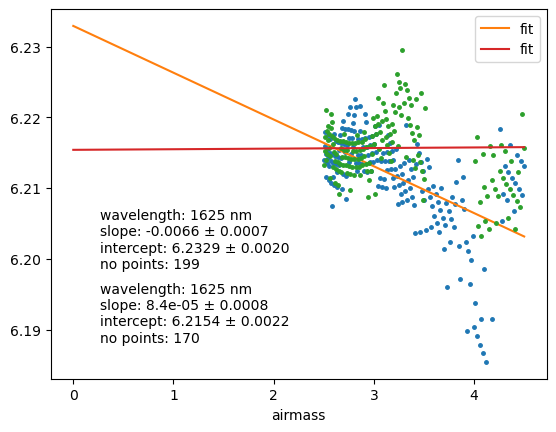

In [157]:
wl = 1625
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

In [158]:
lang = lang_am
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True)
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.langleys/v0.4/langley_am_frc_648_v0.1_20250928.nc')

In [159]:
# lang = lang_pm
# p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
# p2out.parent.mkdir()
# if not p2out.is_file():
#     lang.save2netcdf(p2out)
# else:
#     print('File exist!!!')
# p2out    

# Condition langleyss

In [160]:
import atmPy.radiation.retrievals.langley_calibration as atmlc


In [161]:
prefix = '/Users/htelg'

In [162]:
reload(atmlc)

<module 'atmPy.radiation.retrievals.langley_calibration' from '/Users/htelg/prog/atm-py/atmPy/radiation/retrievals/langley_calibration.py'>

In [163]:
p2fld = pl.Path(f'{prefix}/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.langleys/v{version}/')
lt = atmlc.open_langleys(p2fld)

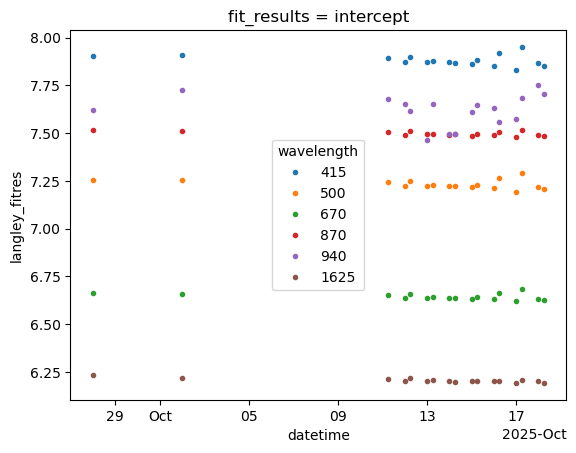

In [164]:
out = lt.dataset.langley_fitres.sel(fit_results = 'intercept').plot.line(x = 'datetime', ls = '', marker = '.')

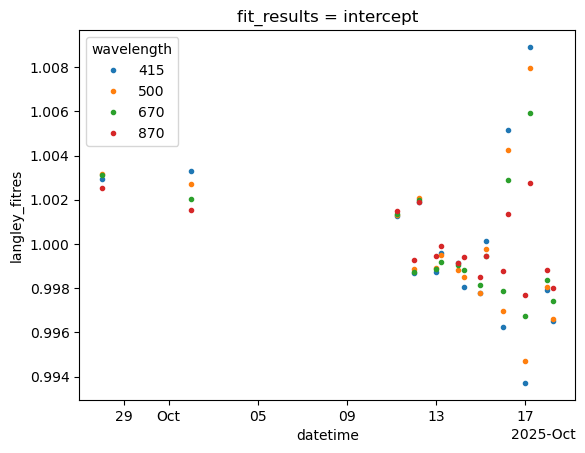

In [165]:
# any sudden steps?
bla = lt.dataset.langley_fitres.sel(fit_results = 'intercept', wavelength = [415, 500, 670, 870])
bla /= bla.mean('datetime')
out = bla.plot.line(x = 'datetime', ls = '', marker = '.')

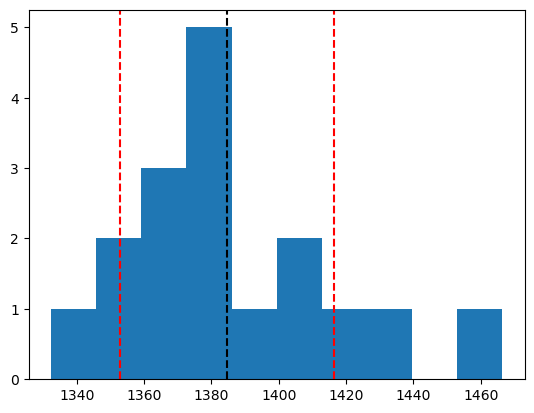

In [166]:
f,a = plt.subplots()
v0s = lt.dataset.langley_fitres.sel(wavelength = 500, fit_results = 'intercept')
v0s = np.exp(v0s)
a.hist(v0s, bins = 10)
a.axvline(v0s.mean(), ls = '--', color = 'black')
a.axvline(v0s.mean() + v0s.std(), ls = '--', color = 'red')
a.axvline(v0s.mean() - v0s.std(), ls = '--', color = 'red')

# remove outliers

In [167]:
import copy

# at individual stderr

In [168]:
lttrunc = copy.deepcopy(lt)
ds = lttrunc.dataset
# remove largest stderr
stderr = ds.langley_fitres.sel(fit_results = 'intercept_stderr')
lttrunc.dataset['langley_fitres'] = ds.langley_fitres.where(stderr < stderr.quantile(0.9, dim = 'datetime'))

# remove outliers based on quantiles
ds = lttrunc.dataset
interc = ds.langley_fitres.sel(fit_results = 'intercept')
where = np.logical_and(interc.quantile(0.1, dim = 'datetime') < interc, interc < interc.quantile(0.9, dim = 'datetime'))
lttrunc.dataset['langley_fitres'] = ds.langley_fitres.where(where)

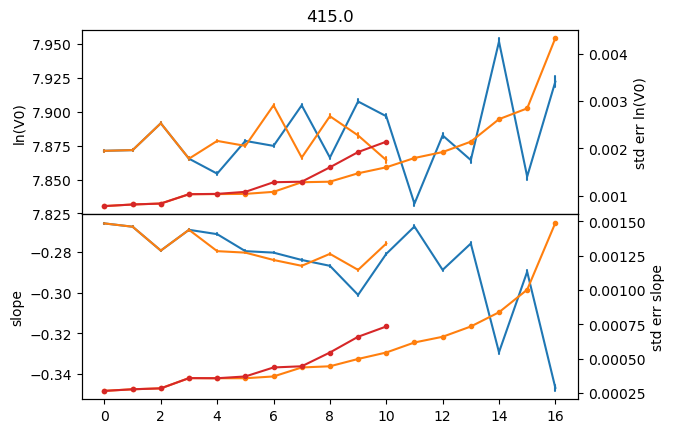

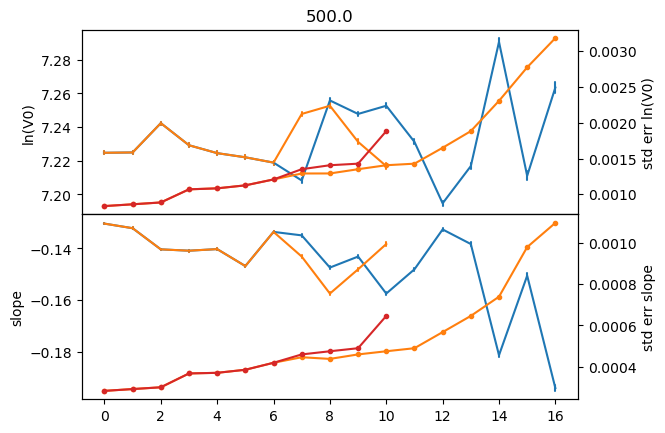

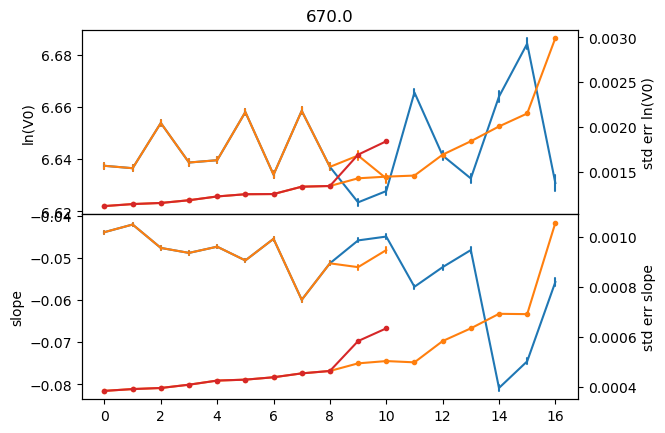

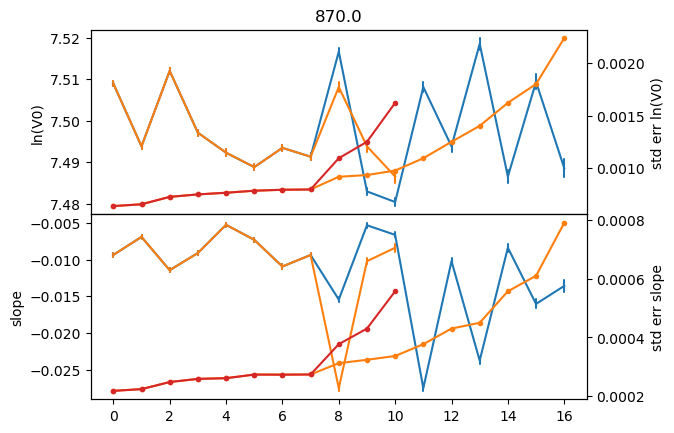

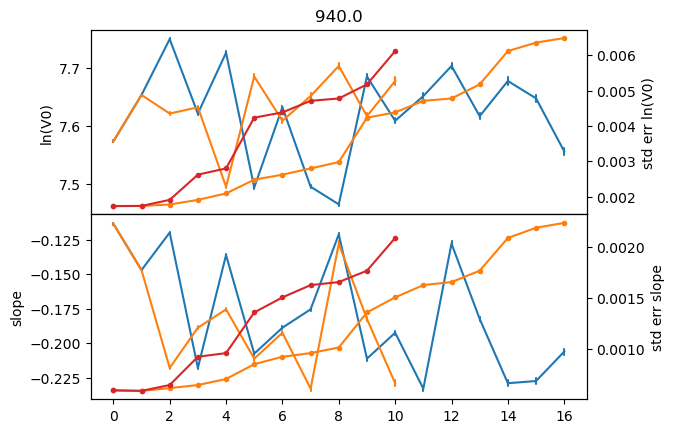

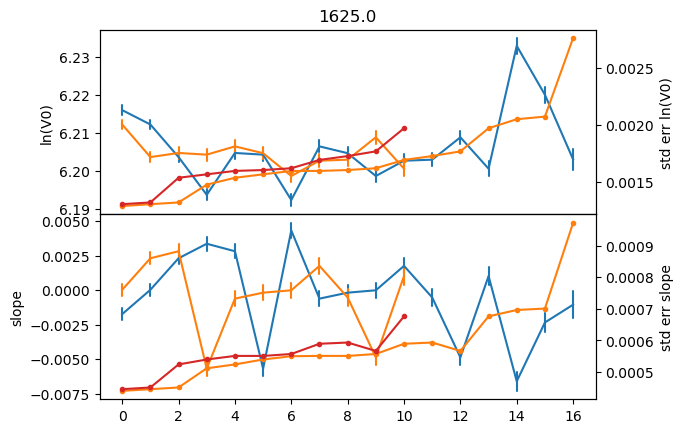

In [169]:
# all sorted by the stderr of the individual channel
wls = lt.dataset.wavelength
for wl in wls:
    f,aa = lt.plot_sorted(wl = wl, wlsort=wl)
    f,aa = lttrunc.plot_sorted(wl = wl, wlsort=wl, aa = aa)
    # aa
    aa[0].set_title(float(wl))

In [170]:
lt.V0_simple.OD_uncertainty

<xarray.DataArray 'OD_uncertainty' (wavelength: 6)> Size: 48B
array([0.04623349, 0.03854758, 0.02833933, 0.02199176, 0.11925225,
       0.01895965])
Coordinates:
  * wavelength  (wavelength) int64 48B 415 500 670 870 940 1625
Attributes:
    description:  (V0_std / V0 * osub) + 0.005. osub: one-sided upper bound f...

In [171]:
lttrunc.V0_simple.OD_uncertainty

<xarray.DataArray 'OD_uncertainty' (wavelength: 6)> Size: 48B
array([0.02675382, 0.02409394, 0.02029891, 0.01888447, 0.09520396,
       0.01093953])
Coordinates:
  * wavelength  (wavelength) int64 48B 415 500 670 870 940 1625
    quantile    float64 8B 0.9
Attributes:
    description:  (V0_std / V0 * osub) + 0.005. osub: one-sided upper bound f...

In [172]:
lttrunc.V0_simple.V0_std/lttrunc.V0_simple.V0

<xarray.DataArray (wavelength: 6)> Size: 48B
array([0.01365527, 0.01198561, 0.0096034 , 0.00871553, 0.05662265,
       0.00372835])
Coordinates:
  * wavelength  (wavelength) int64 48B 415 500 670 870 940 1625
    quantile    float64 8B 0.9
Attributes:
    description:  nbiased standard deviation, ddof = 1

In [174]:
p2f = pl.Path().resolve() / f'data/V0_simple_{serialno}_v{version}.nc'
# p2f.unlink()
if p2f.exists():
    print(f'File already exists: {p2f}')
else:
    lttrunc.V0_simple.to_netcdf(p2f)
    print(f'Saved to {p2f}')

Saved to /Users/htelg/projects/cmpaign_2025_PMOD/data/V0_simple_648_v0.4.nc


# compare to previous

In [177]:
import atmPy.radiation.retrievals.langley_calibration as atmlc

In [178]:
prefix = '/Users/htelg'

In [179]:
reload(atmlc)

<module 'atmPy.radiation.retrievals.langley_calibration' from '/Users/htelg/prog/atm-py/atmPy/radiation/retrievals/langley_calibration.py'>

In [181]:
p2fld = pl.Path(f'{prefix}/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.langleys/v{version}/')
lt04 = atmlc.open_langleys(p2fld)

In [180]:
p2fld = pl.Path(f'{prefix}/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.langleys/v0.3')
lt03 = atmlc.open_langleys(p2fld)

In [176]:
v04

<xarray.Dataset> Size: 344B
Dimensions:                              (wavelength: 6)
Coordinates:
  * wavelength                           (wavelength) int64 48B 415 500 ... 1625
    quantile                             float64 8B ...
Data variables:
    V0                                   (wavelength) float64 48B ...
    V0_std                               (wavelength) float64 48B ...
    no_langleys                          (wavelength) int64 48B ...
    one_sided_upper_bound_factor_95conf  (wavelength) float64 48B ...
    OD_uncertainty                       (wavelength) float64 48B ...
    V0_stderr                            (wavelength) float64 48B ...

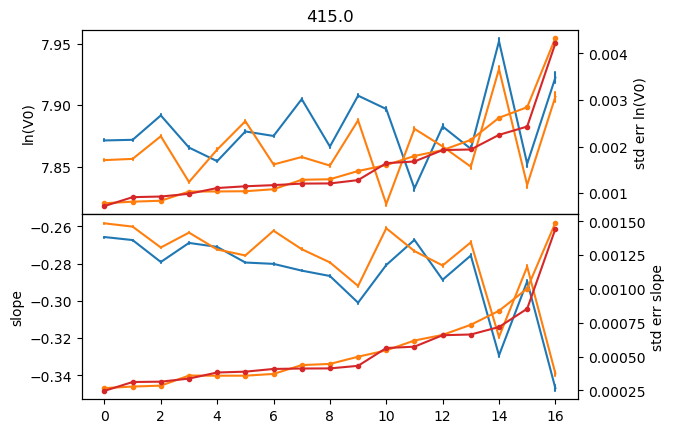

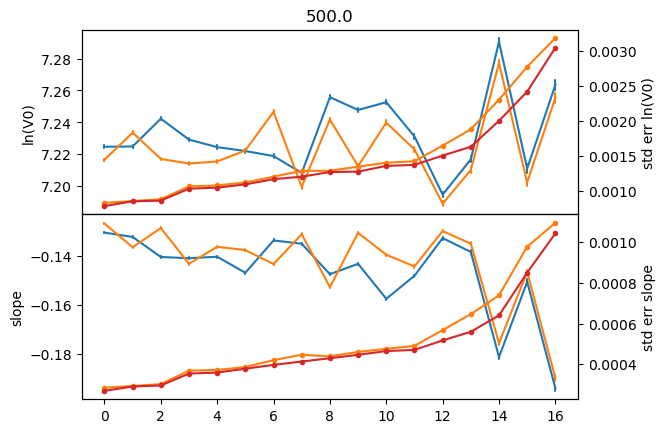

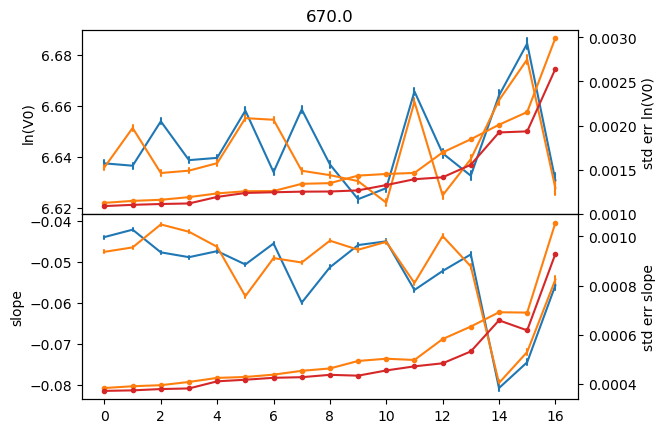

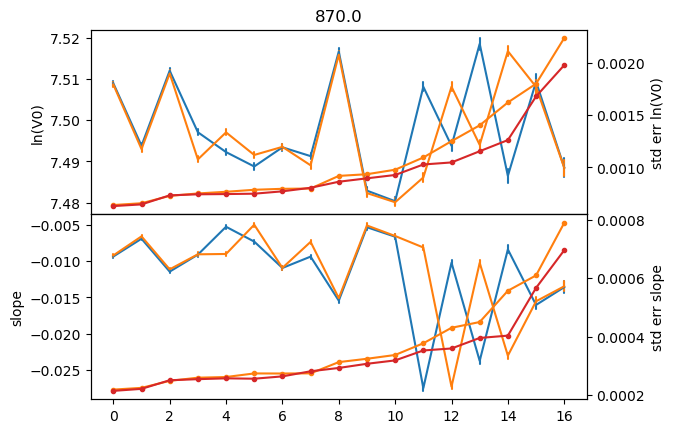

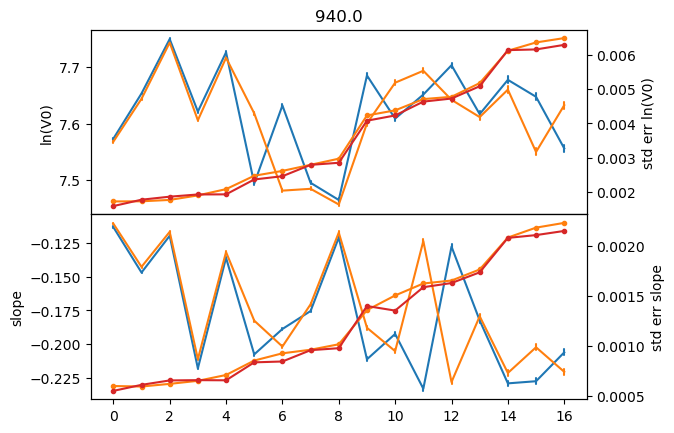

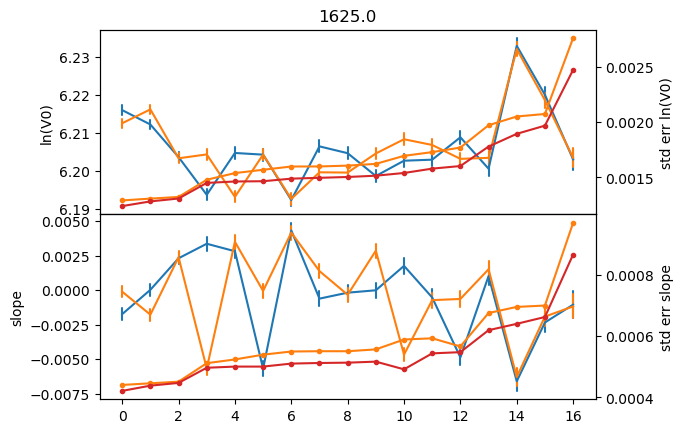

In [184]:
# all sorted by the stderr of the individual channel
wls = lt04.dataset.wavelength
for wl in wls:
    f,aa = lt04.plot_sorted(wl = wl, wlsort=wl)   
    # f,aa = lttrunc.plot_sorted(wl = wl, wlsort=wl, aa = aa)
    f,aa = lt03.plot_sorted(wl = wl, wlsort=wl,aa = aa)
    # aa
    aa[0].set_title(float(wl))